In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install mpl_finance
!pip install --upgrade mplfinance

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from mpl_finance import candlestick_ohlc
from matplotlib.gridspec import GridSpec
from datetime import datetime

In [5]:
file_path = '/Users/yoonjiha/Desktop/파란학기/bluesemesterdata'

In [6]:
data = pd.read_csv(file_path + "/total_data2.csv")
data

,Unnamed: 0,date,open,high,low,close,volume,market_cap,dominance,alt_dominance,btc_dominance,active_cryptocurrencies,active_exchanges,coin_name,blockchain_name,file_name
0,0,2022-04-01T00:00:00.000Z,1.000000,1.000321,0.999336,1.000000,824574.086052,19000181.0,41.101777,69.786437,41.103488,9877,495,BTC,btc1,BTC_btc1.csv
1,1,2022-04-02T00:00:00.000Z,1.000000,1.000529,0.999983,1.000000,639574.150576,19001018.0,40.925880,69.273726,40.921498,9865,495,BTC,btc1,BTC_btc1.csv
2,2,2022-04-03T00:00:00.000Z,1.000000,1.000708,0.999944,1.000000,547092.488473,19001856.0,40.740542,68.745213,40.736904,9867,495,BTC,btc1,BTC_btc1.csv
3,3,2022-04-04T00:00:00.000Z,1.000000,1.000264,0.998749,1.000000,697081.106218,19002875.0,41.016201,69.539029,41.017007,9858,495,BTC,btc1,BTC_btc1.csv
4,4,2022-04-05T00:00:00.000Z,1.000000,1.000340,0.999754,1.000000,650641.152564,19003756.0,41.010676,69.516026,41.005437,9858,495,BTC,btc1,BTC_btc1.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14260,360,2023-03-27T00:00:00.000Z,0.000033,0.000034,0.000033,0.000033,6.644220,0.0,0.000000,0.000000,46.286695,9110,578,JUNO,btc1,JUNO_btc1.csv
14261,361,2023-03-28T00:00:00.000Z,0.000033,0.000037,0.000033,0.000037,17.882956,0.0,0.000000,0.000000,45.839795,9103,578,JUNO,btc1,JUNO_btc1.csv
14262,362,2023-03-29T00:00:00.000Z,0.000037,0.000037,0.000036,0.000037,12.772122,0.0,0.000000,0.000000,46.376280,9095,585,JUNO,btc1,JUNO_btc1.csv
14263,363,2023-03-30T00:00:00.000Z,0.000037,0.000037,0.000036,0.000037,6.170401,0.0,0.000000,0.000000,46.205434,9109,590,JUNO,btc1,JUNO_btc1.csv


In [67]:
def cdstick(df,coin):
    plt.figure(figsize = (16,9))
    ax = plt.subplot(1,1,1)
    plt.title(coin+' candle stick')

    candlestick_ohlc(ax, df.values, width=0.6, colorup='red',colordown='blue')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.grid(color='gray',linestyle='--')
    plt.show()

In [20]:
coin_list = data.coin_name.unique()
coin_list

array(['BTC', 'RUNE', 'FET', 'BAND', 'MED', 'JUNO', 'KAVA', 'CRO', 'INJ',
       'COSMOS', 'OSMO', 'KDA', 'ETH'], dtype=object)

In [69]:
file_list = []
for coin in coin_list:    
    globals()[f"df_{coin}"] = data[data.coin_name == coin]
    tmp_data = globals()[f"df_{coin}"][['date', 'open','high','low','close','file_name']]
    tmp_data['date'] = pd.to_datetime(tmp_data['date'])
    tmp_data = tmp_data[tmp_data['date'] > '2022-12-31']
    tmp_data['date'] = tmp_data['date'].map(mdates.date2num)
    
    globals()[f"file_{coin}"] = tmp_data.file_name.unique()
    file_list.append(globals()[f"file_{coin}"])

    for i in range(len(globals()[f"file_{coin}"])):
        globals()[f"{coin}_data{i}"] = tmp_data[tmp_data['file_name'] == globals()[f"file_{coin}"][i]]

/var/folders/rz/fqp0nbd52px3k0c93ldtw5fh0000gn/T/ipykernel_3738/3860145431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_data['date'] = pd.to_datetime(tmp_data['date'])
/var/folders/rz/fqp0nbd52px3k0c93ldtw5fh0000gn/T/ipykernel_3738/3860145431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_data['date'] = pd.to_datetime(tmp_data['date'])
/var/folders/rz/fqp0nbd52px3k0c93ldtw5fh0000gn/T/ipykernel_3738/3860145431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [68]:
coin_list

array(['BTC', 'RUNE', 'FET', 'BAND', 'MED', 'JUNO', 'KAVA', 'CRO', 'INJ',
       'COSMOS', 'OSMO', 'KDA', 'ETH'], dtype=object)

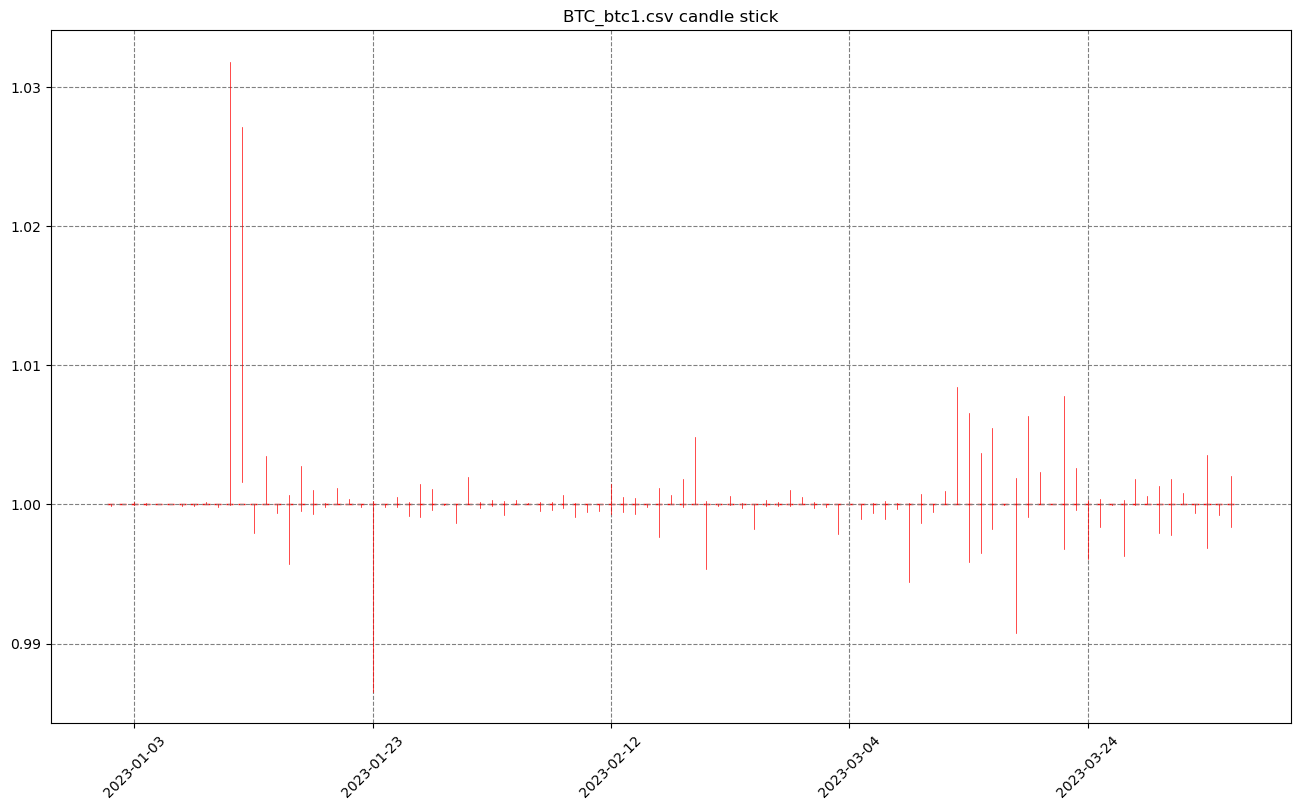

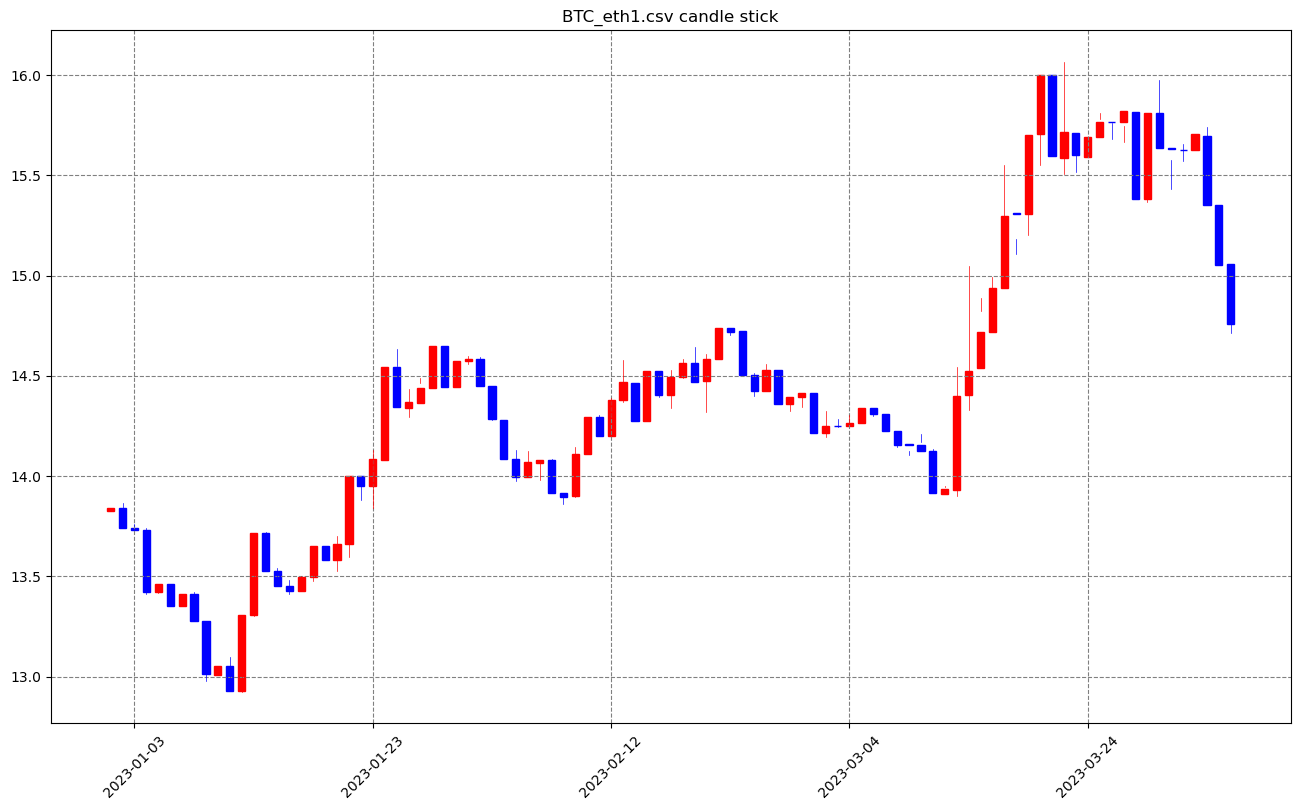

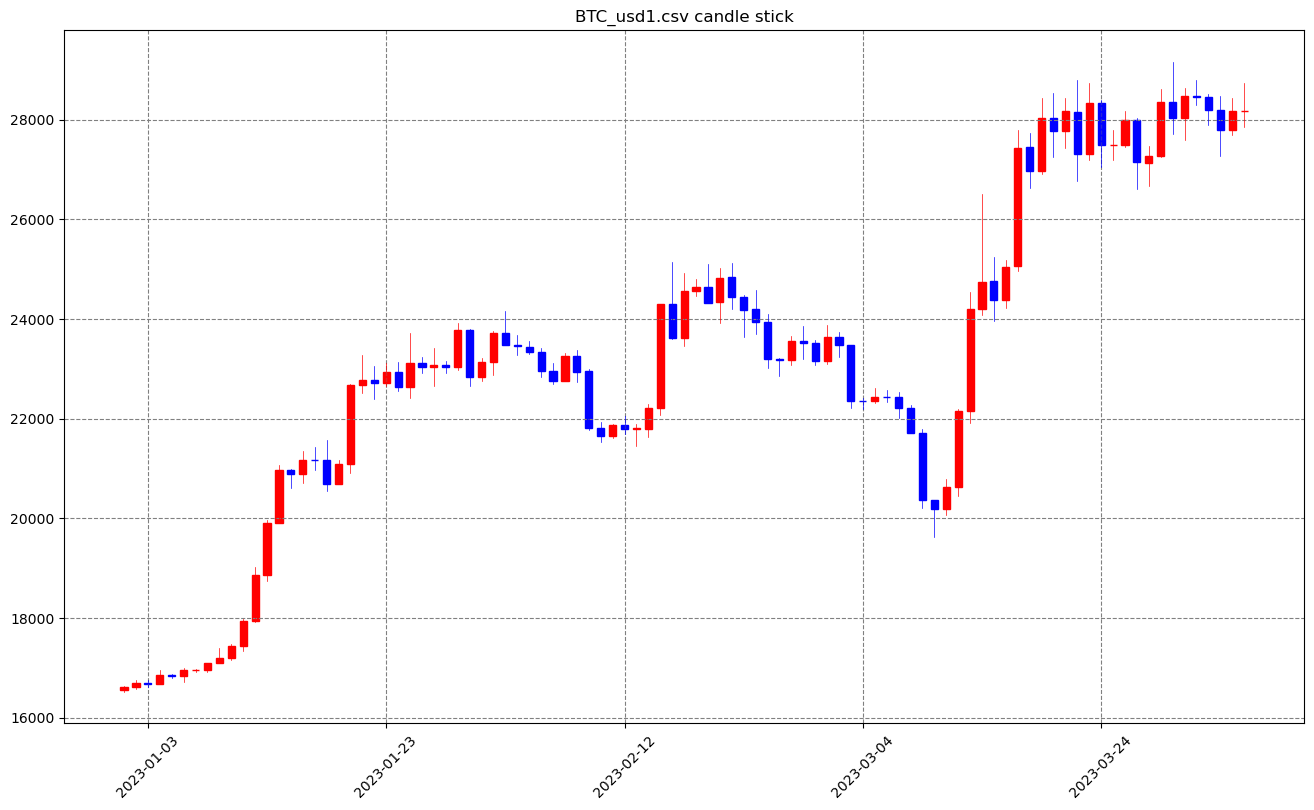

In [76]:
for i in range(len(file_list[0])):
    cdstick(globals()[f"BTC_data{i}"],file_list[0][i])

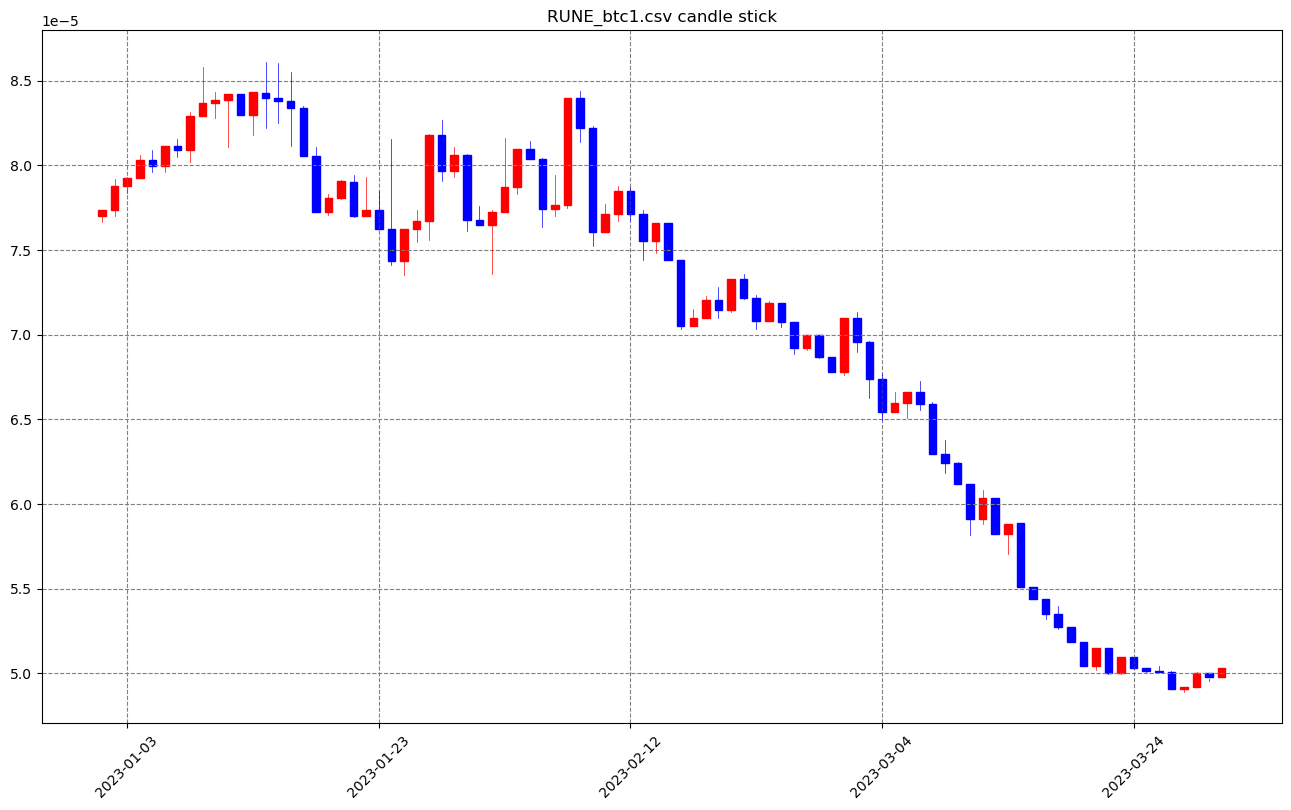

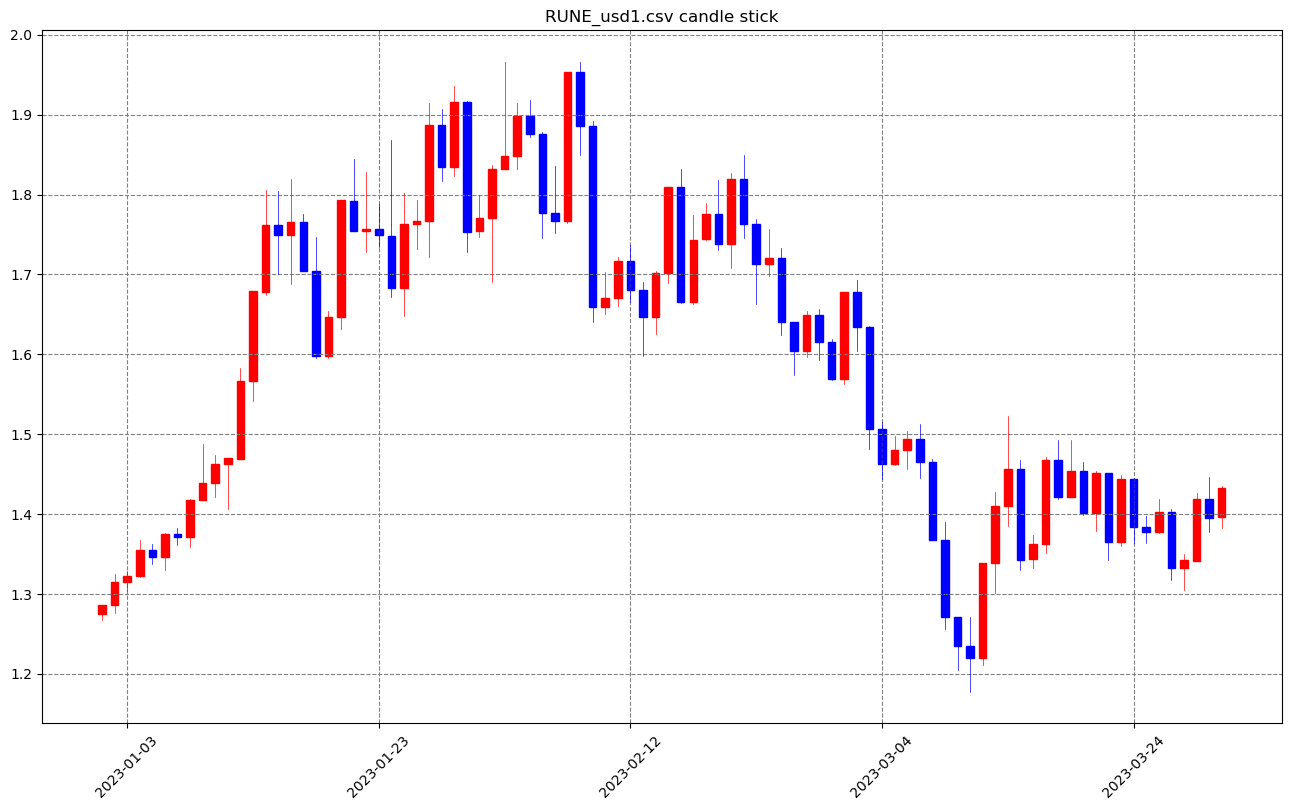

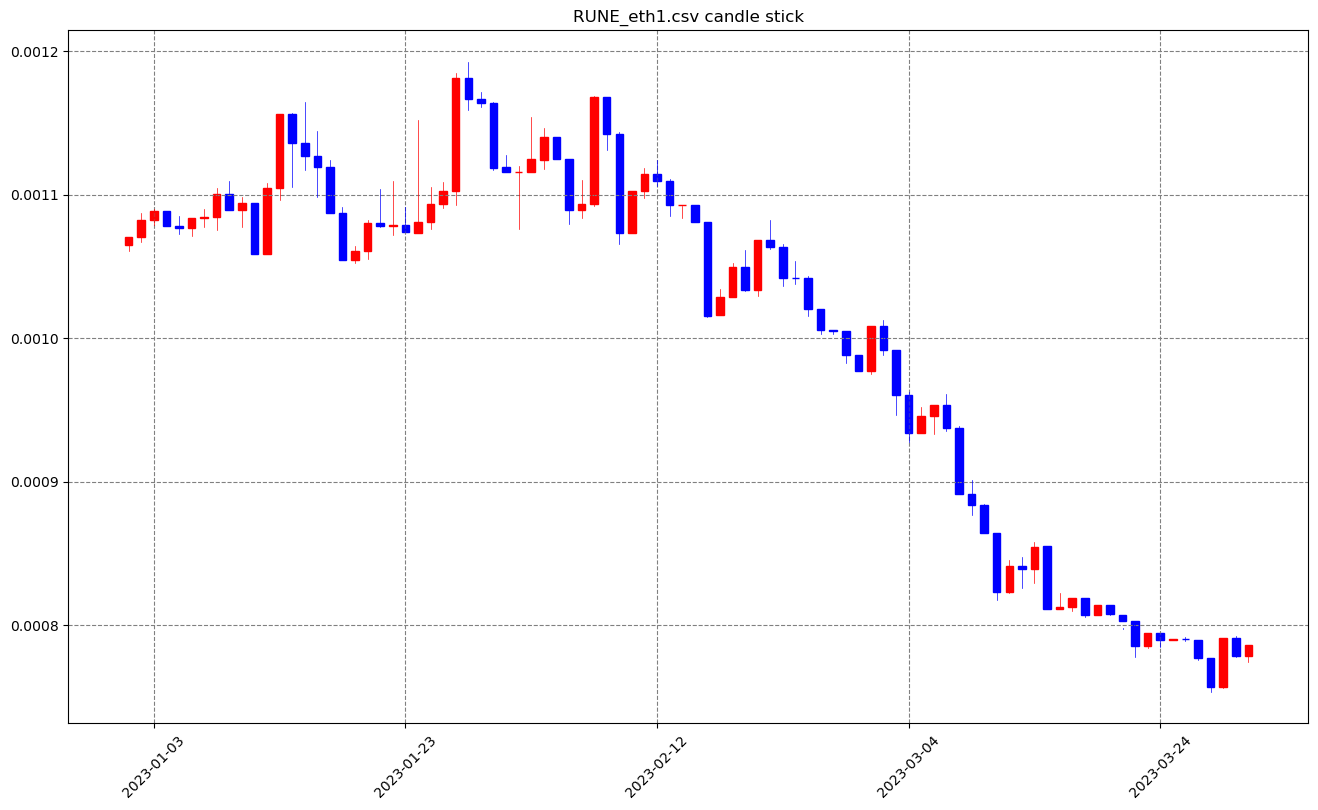

In [79]:
for i in range(len(file_list[1])):
    cdstick(globals()[f"RUNE_data{i}"],file_list[1][i])

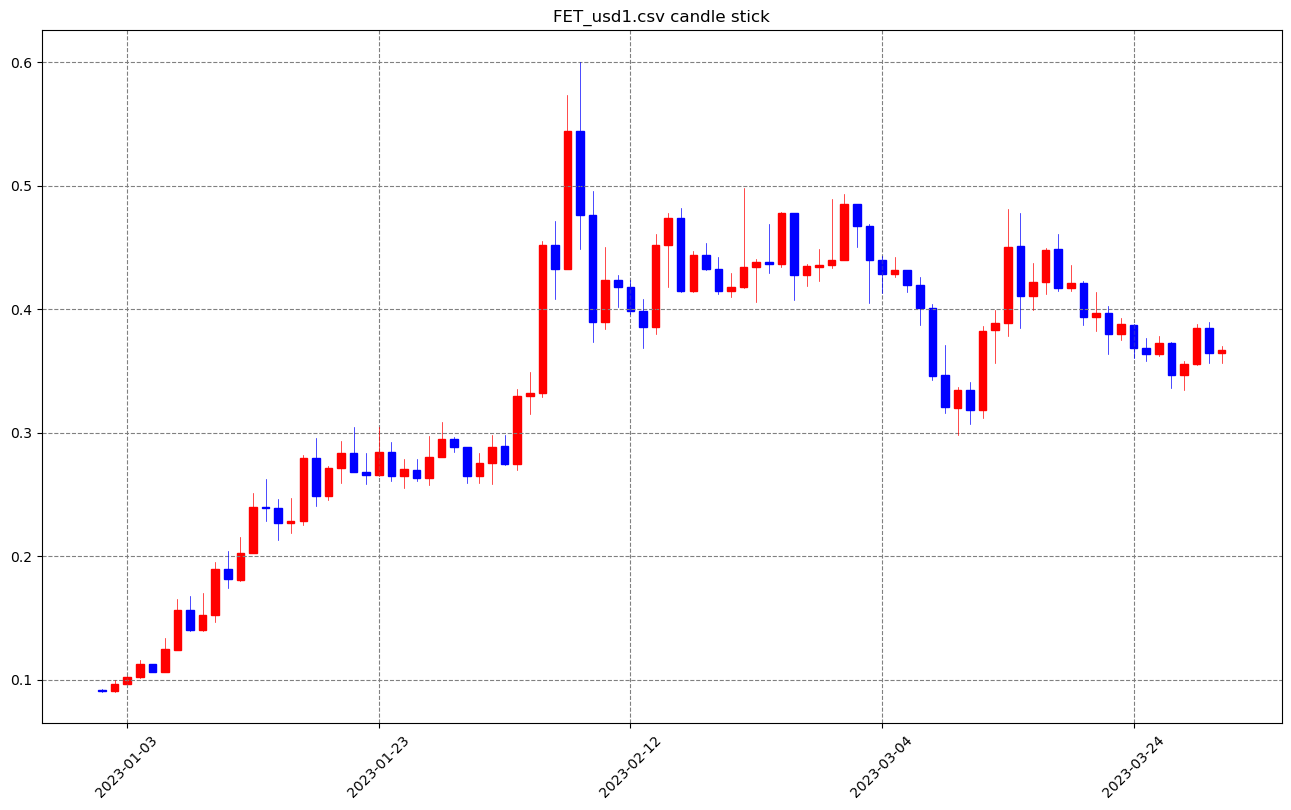

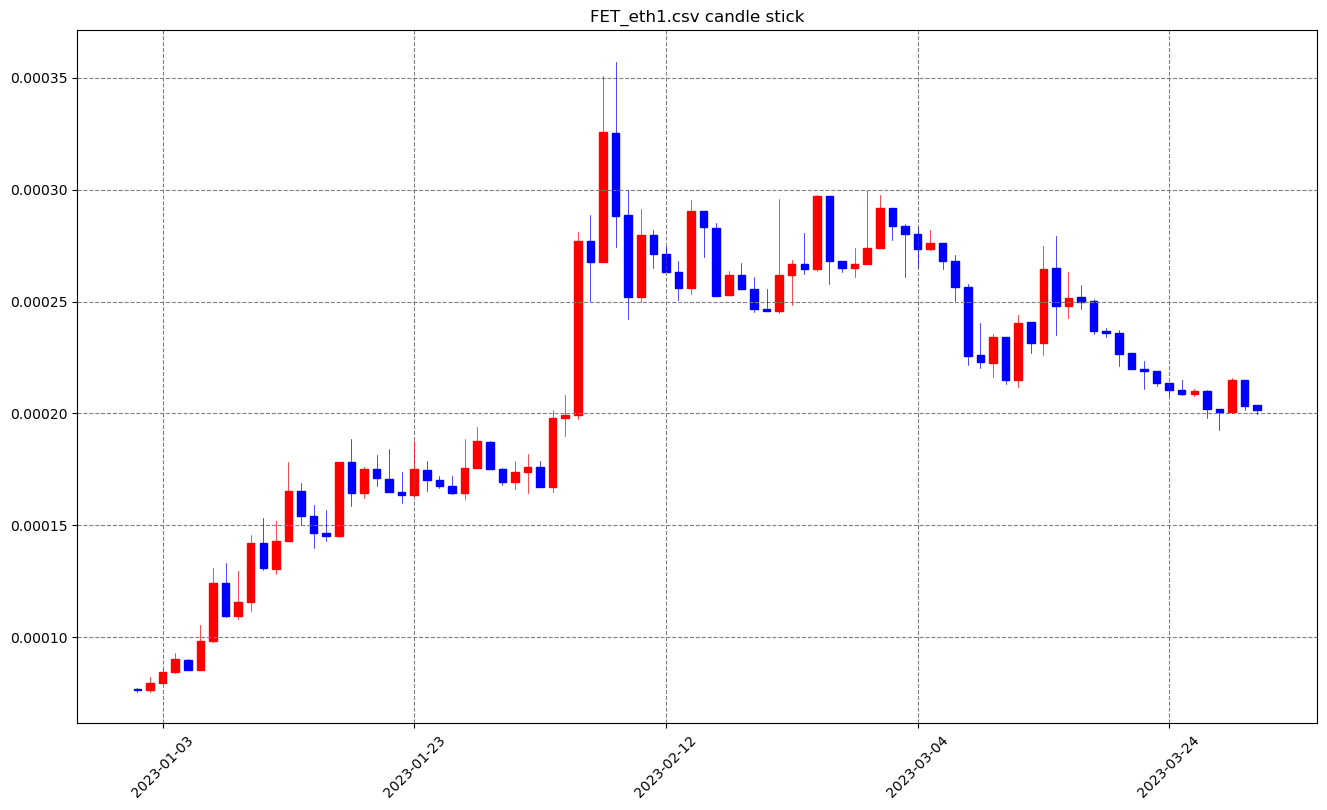

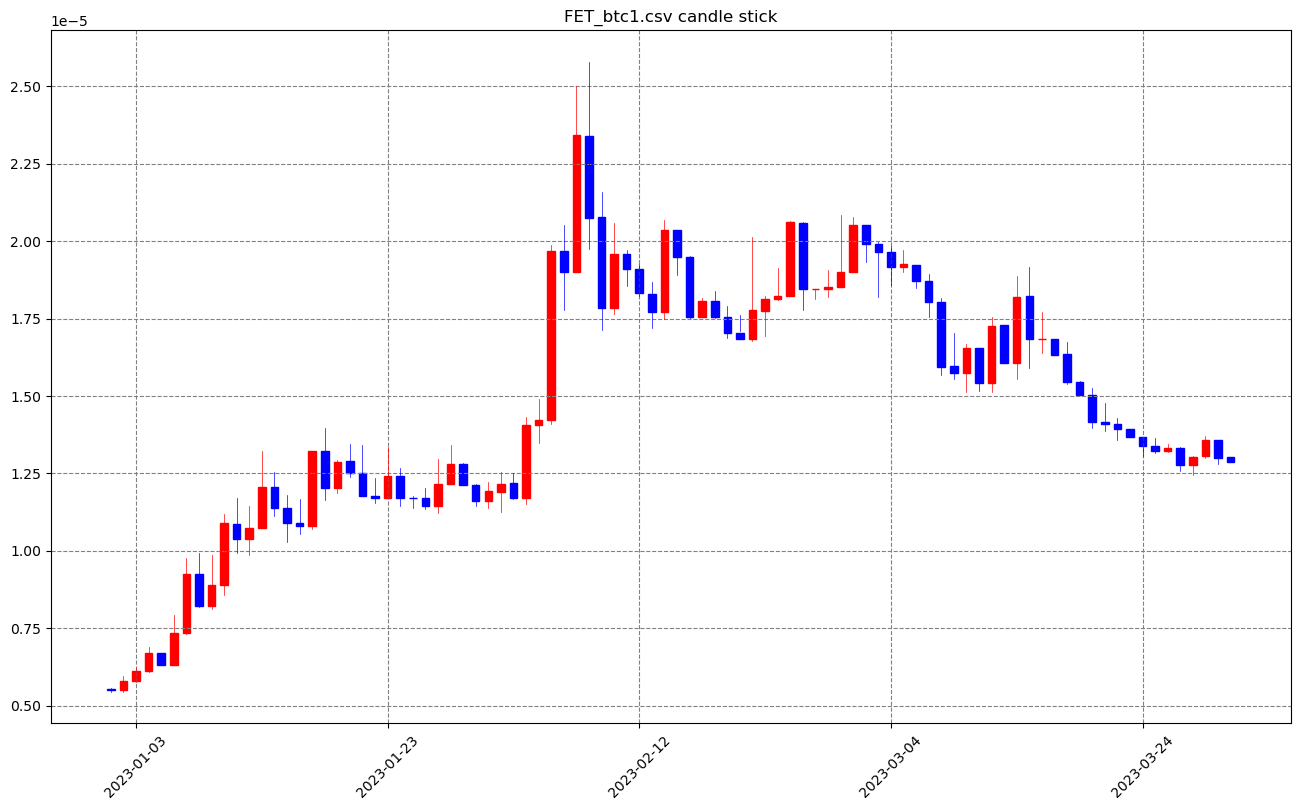

In [80]:
for i in range(len(file_list[2])):
    cdstick(globals()[f"FET_data{i}"],file_list[2][i])

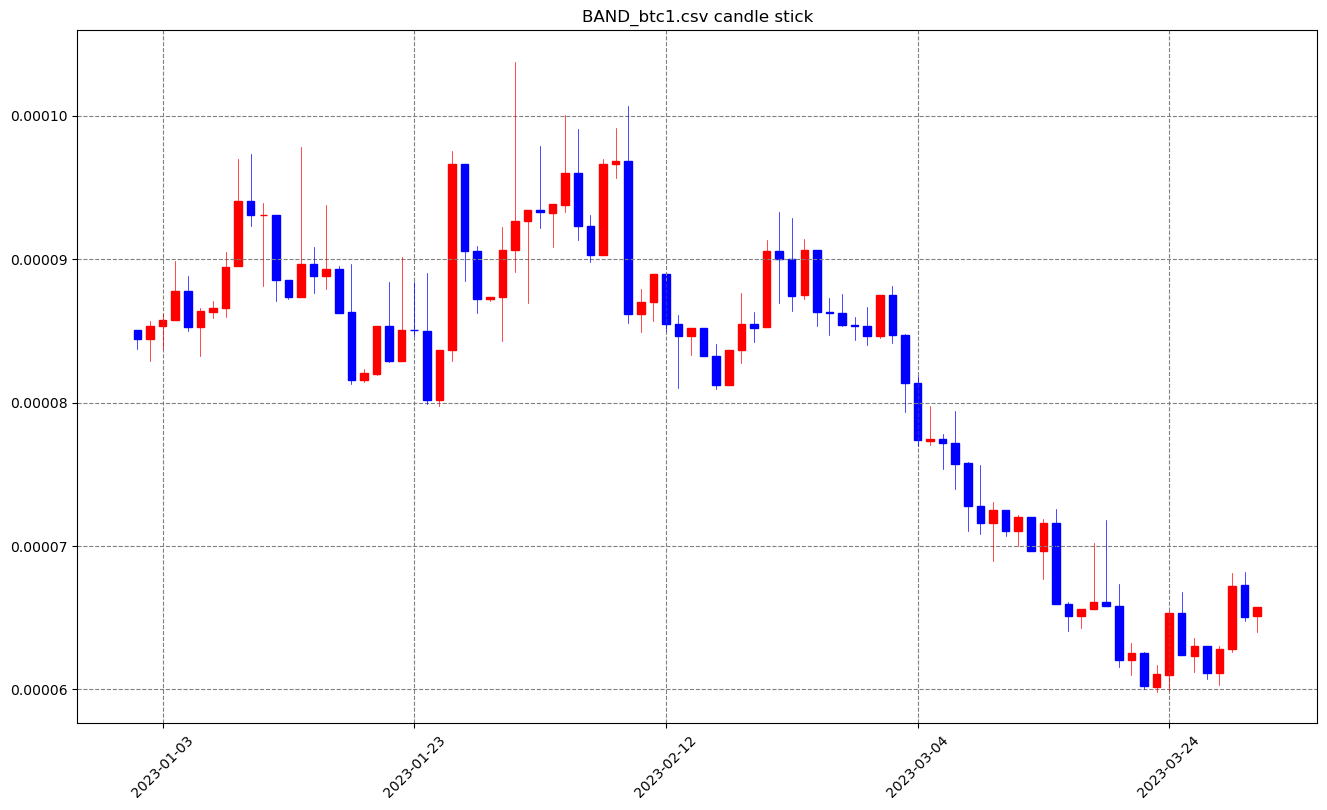

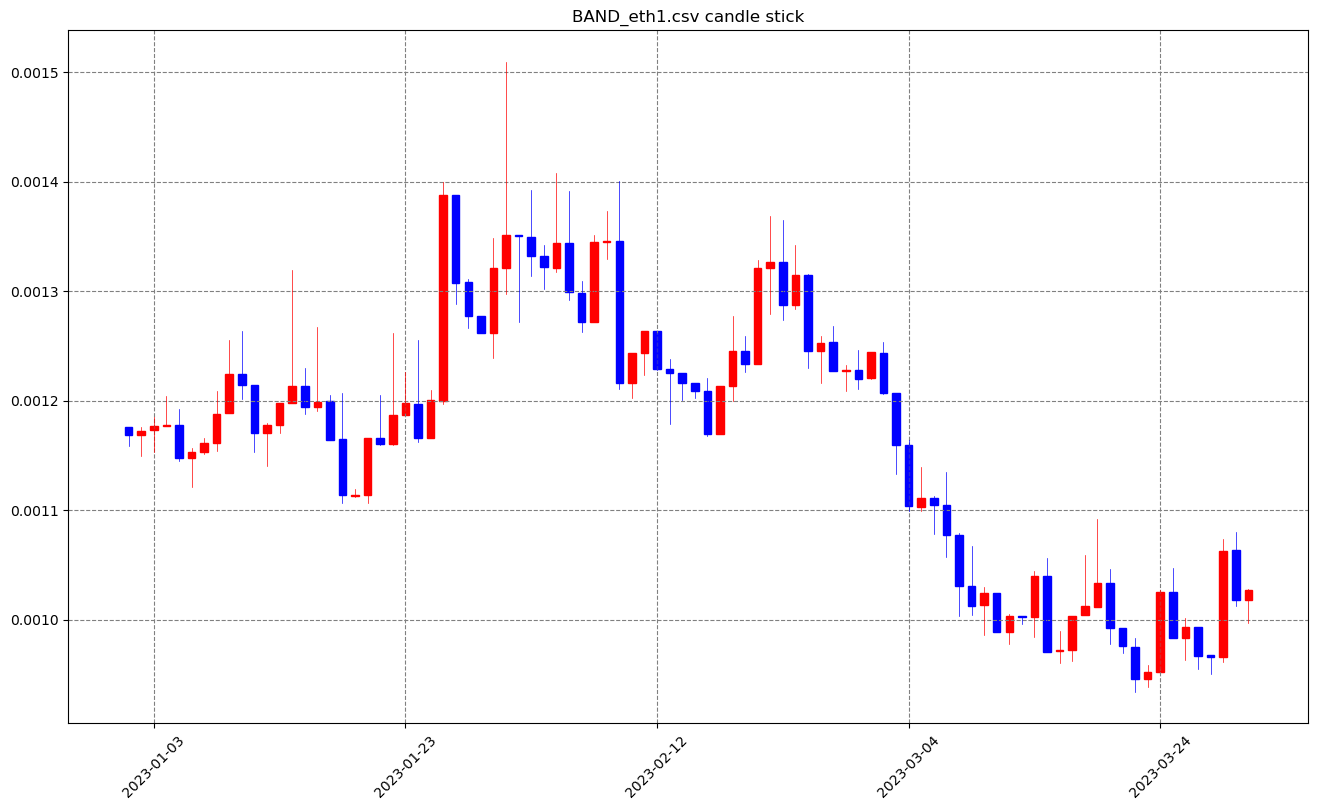

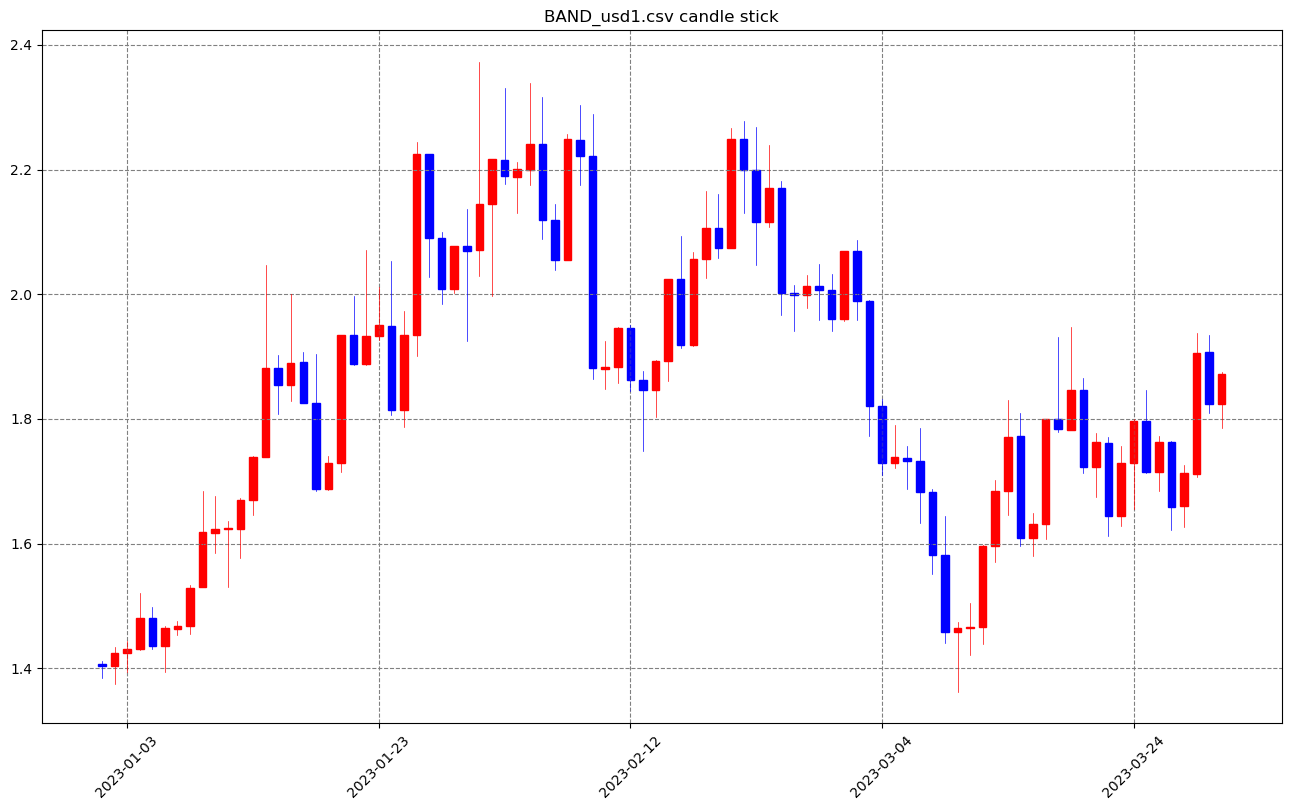

In [81]:
for i in range(len(file_list[3])):
    cdstick(globals()[f"BAND_data{i}"],file_list[3][i])

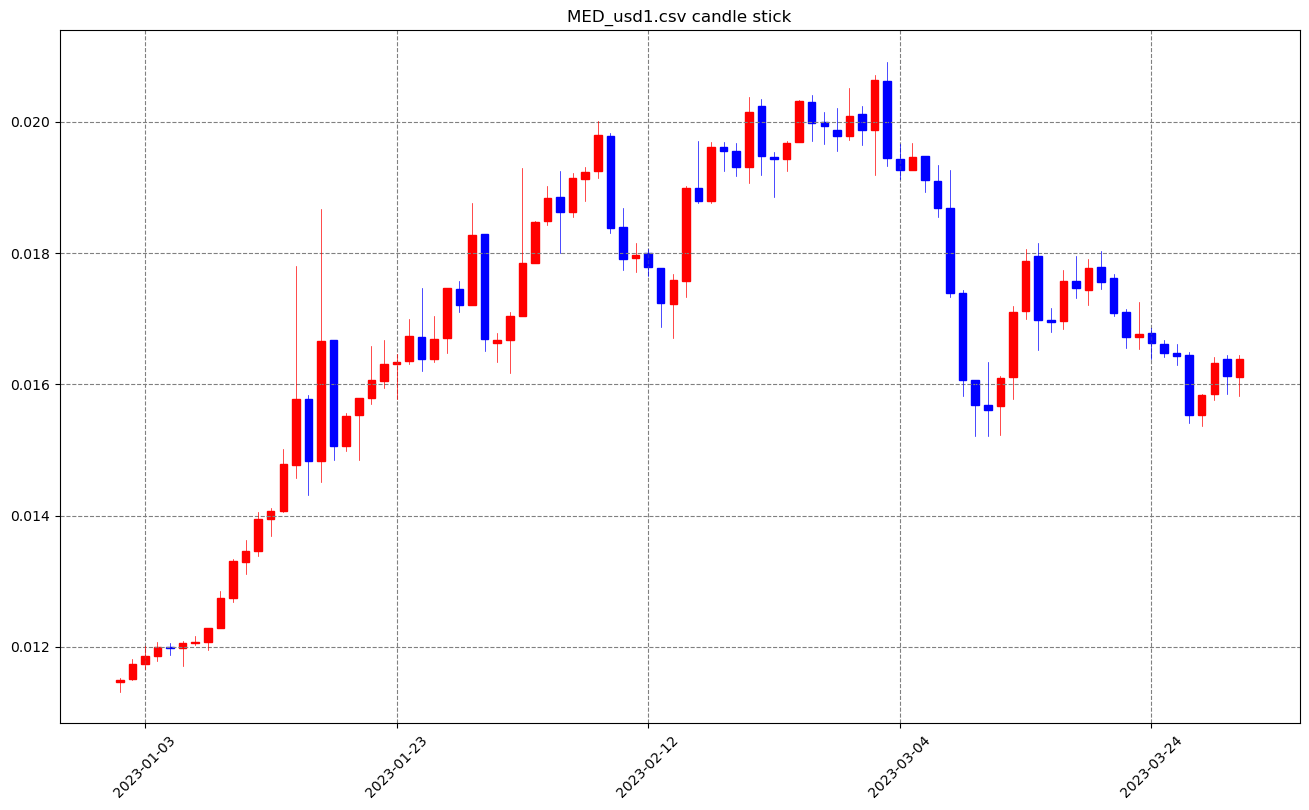

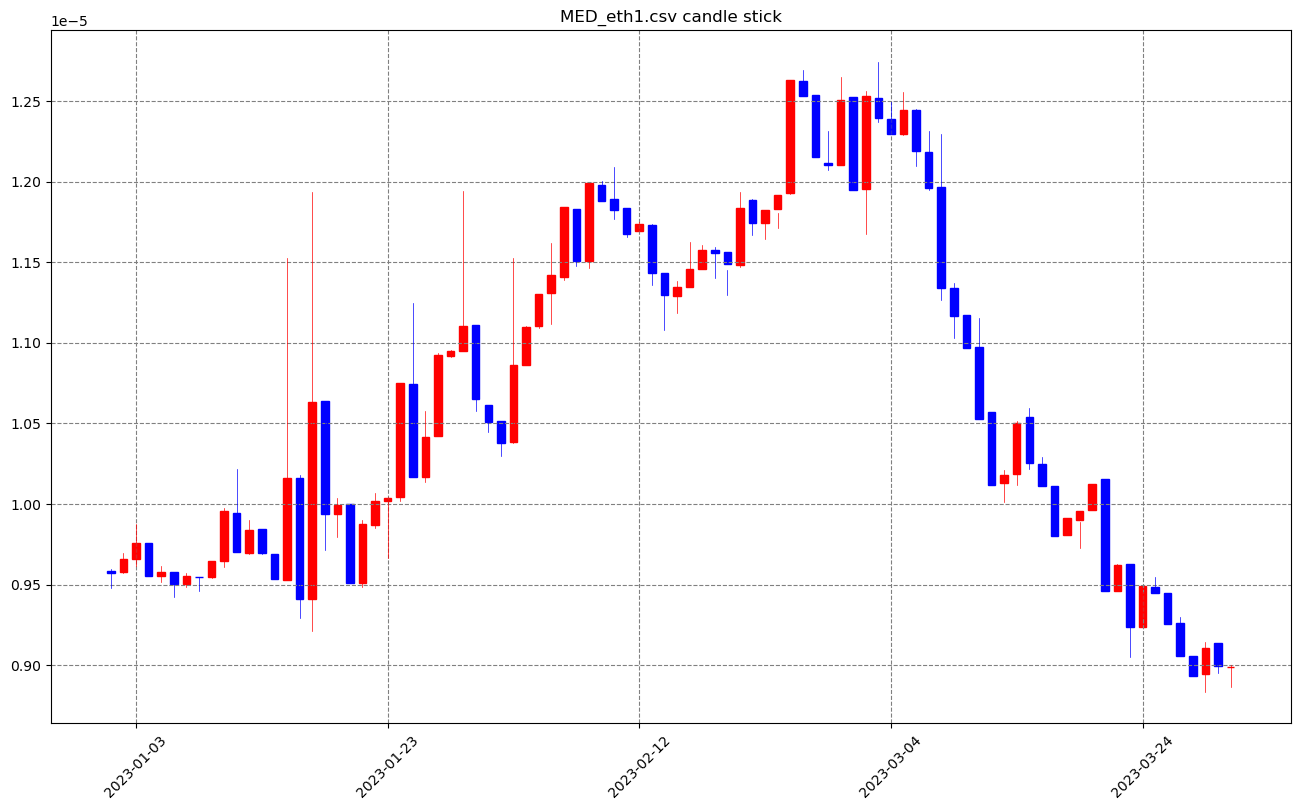

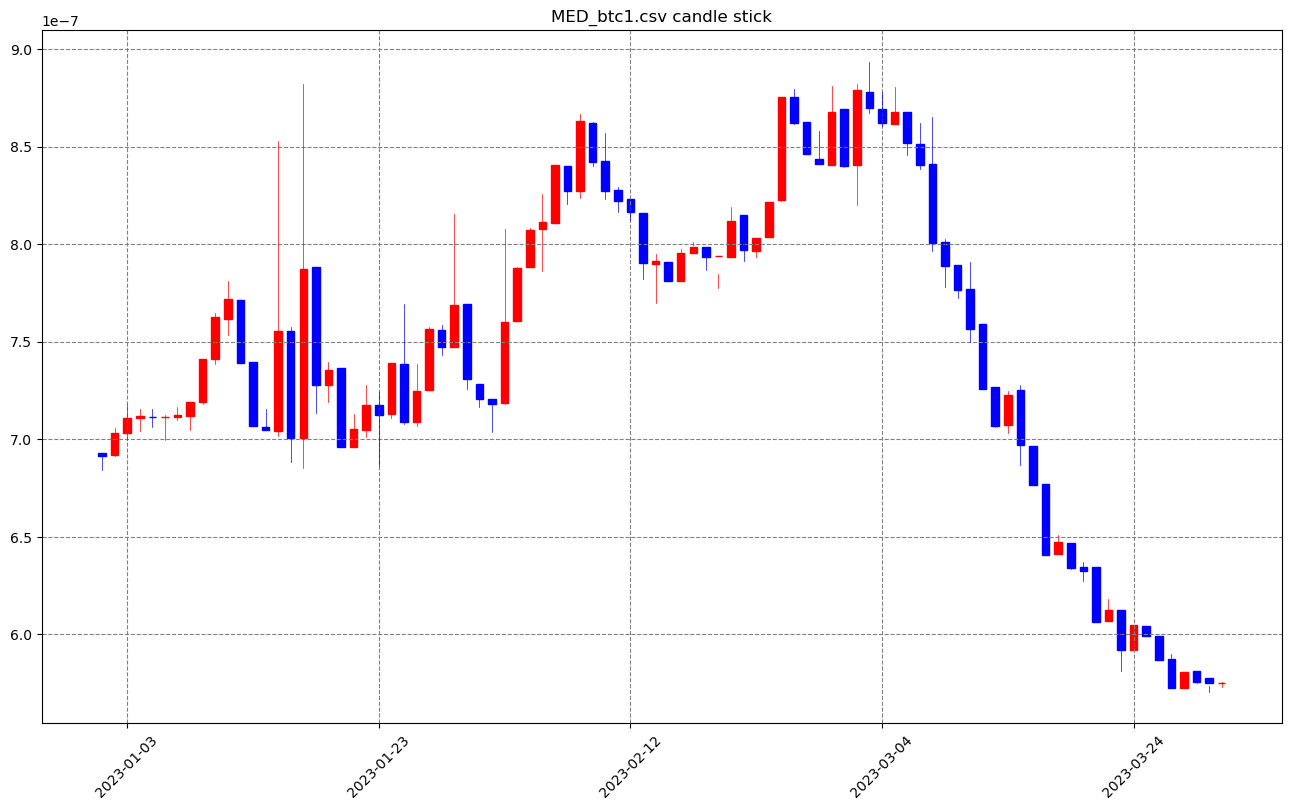

In [82]:
for i in range(len(file_list[4])):
    cdstick(globals()[f"MED_data{i}"],file_list[4][i])

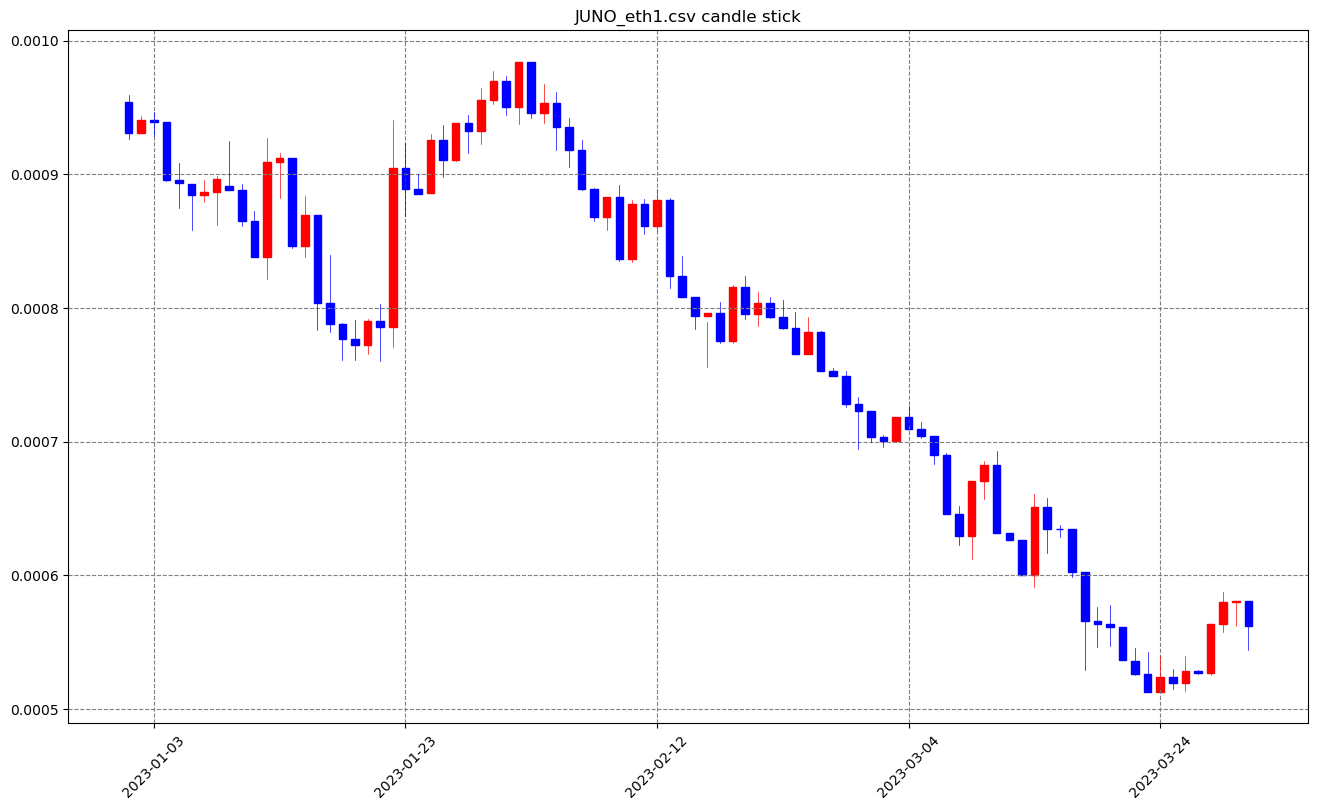

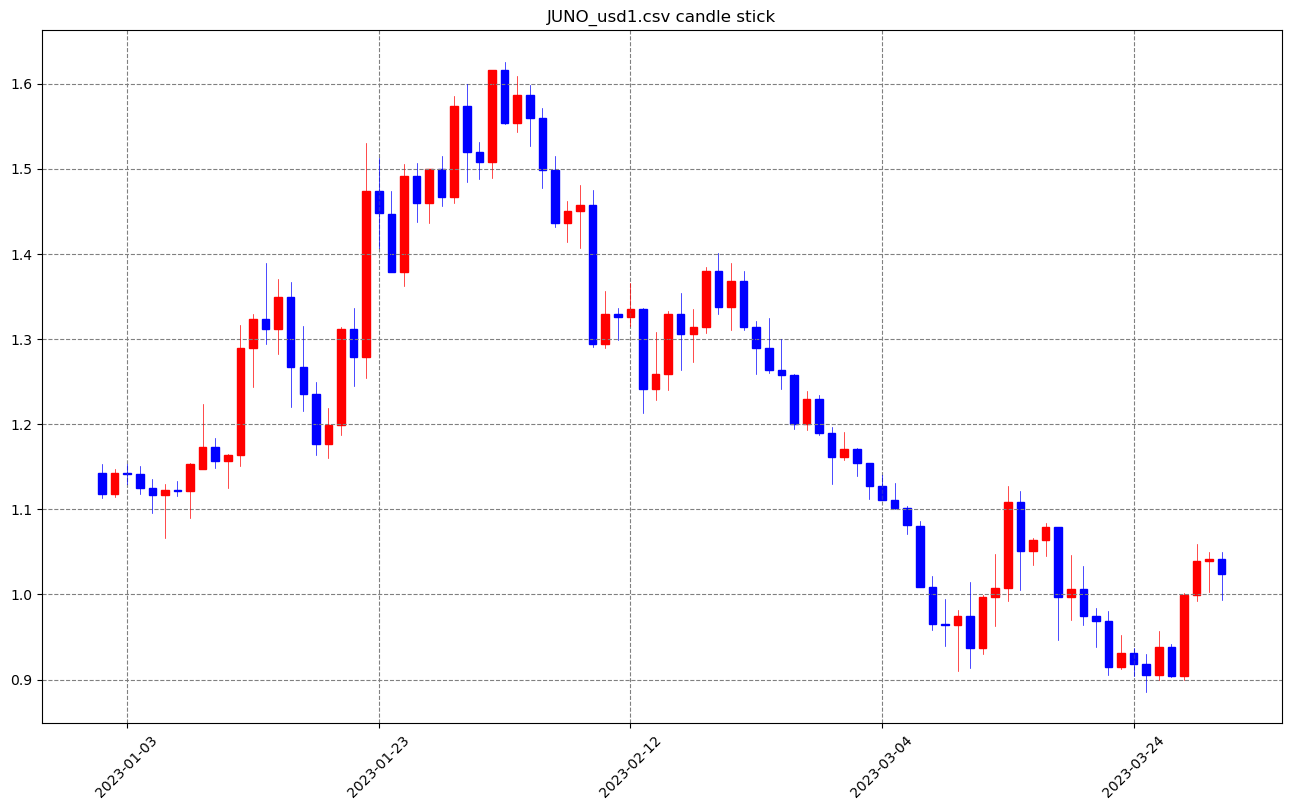

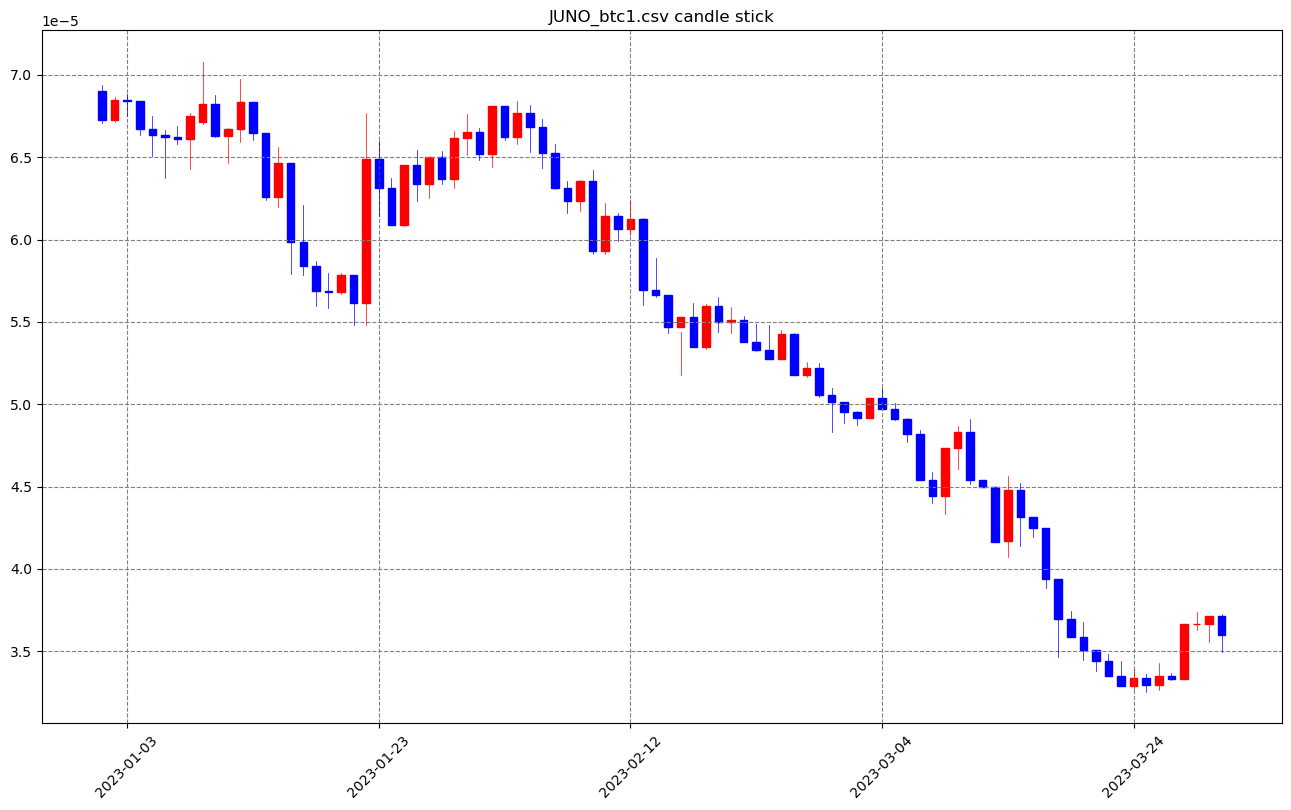

In [84]:
for i in range(len(file_list[5])):
    cdstick(globals()[f"JUNO_data{i}"],file_list[5][i])

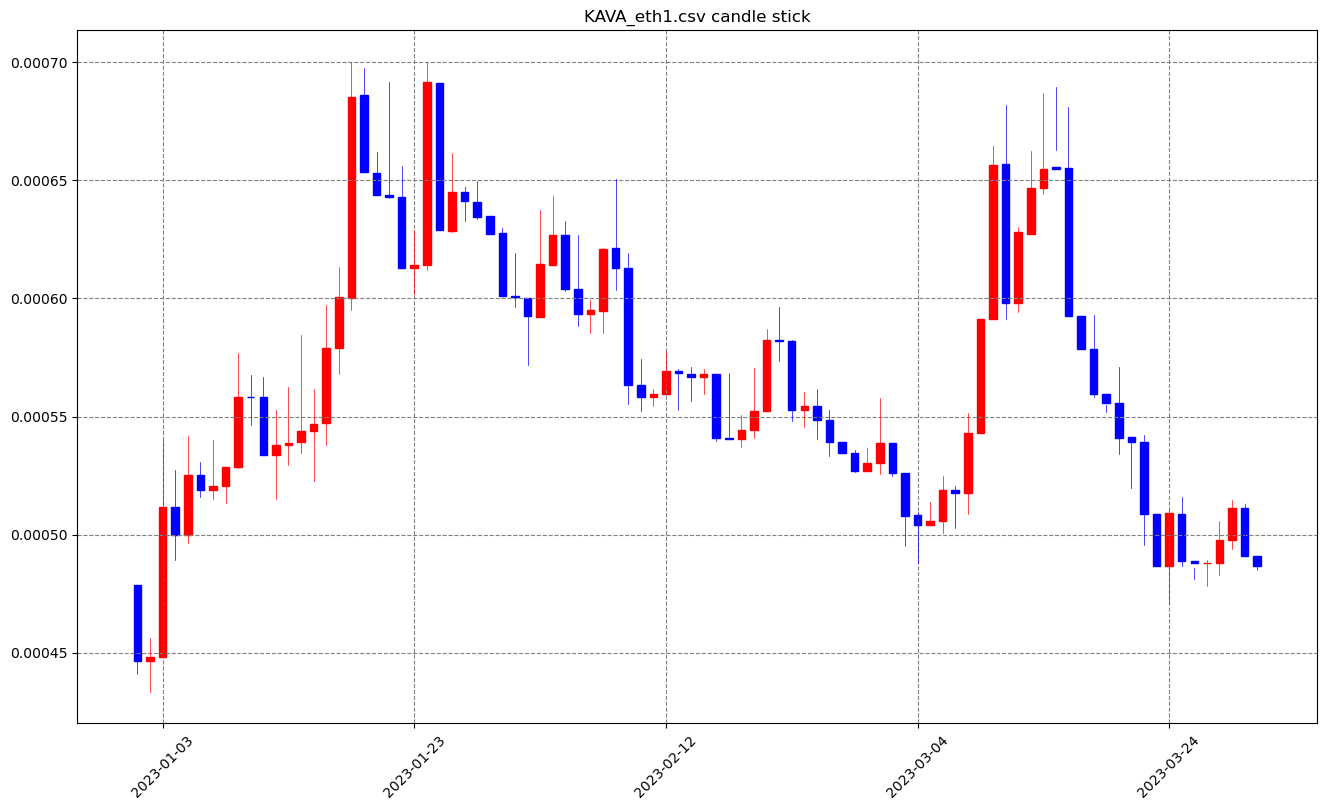

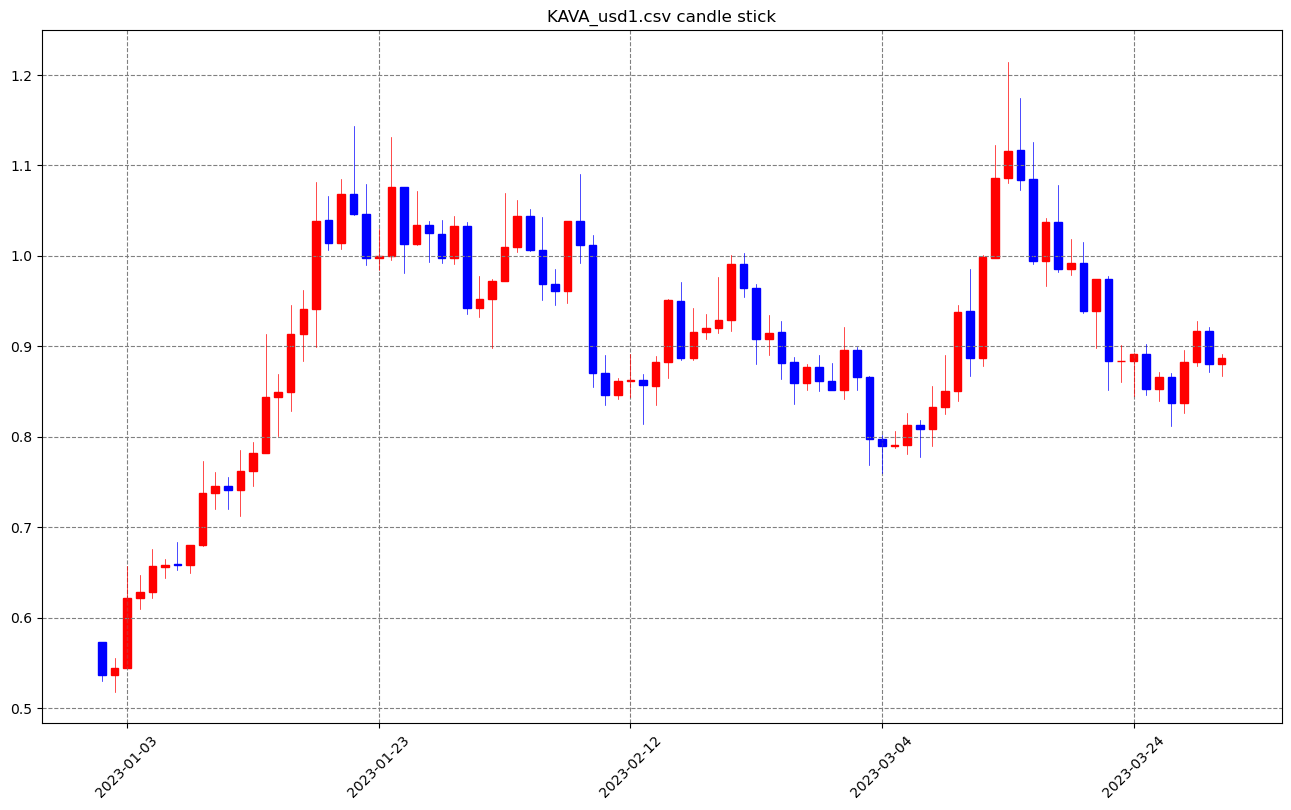

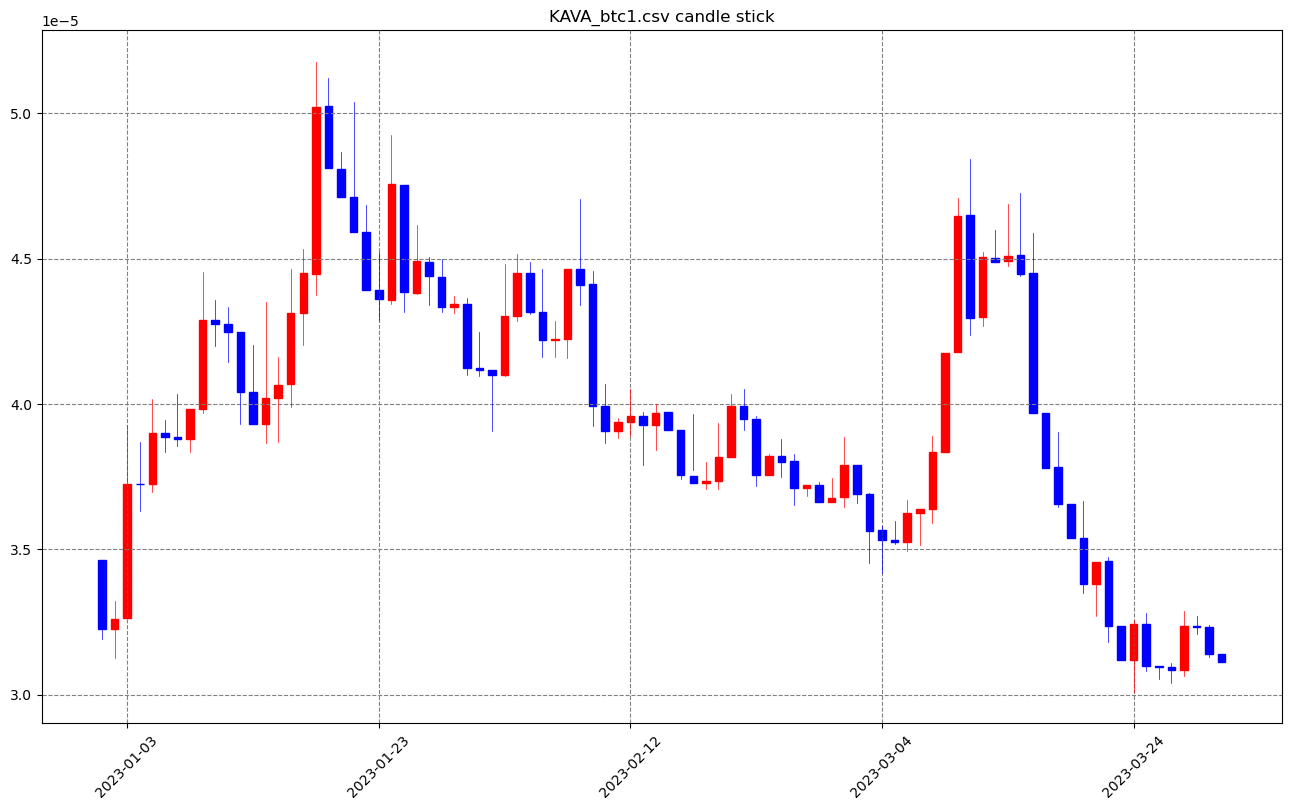

In [85]:
for i in range(len(file_list[6])):
    cdstick(globals()[f"KAVA_data{i}"],file_list[6][i])

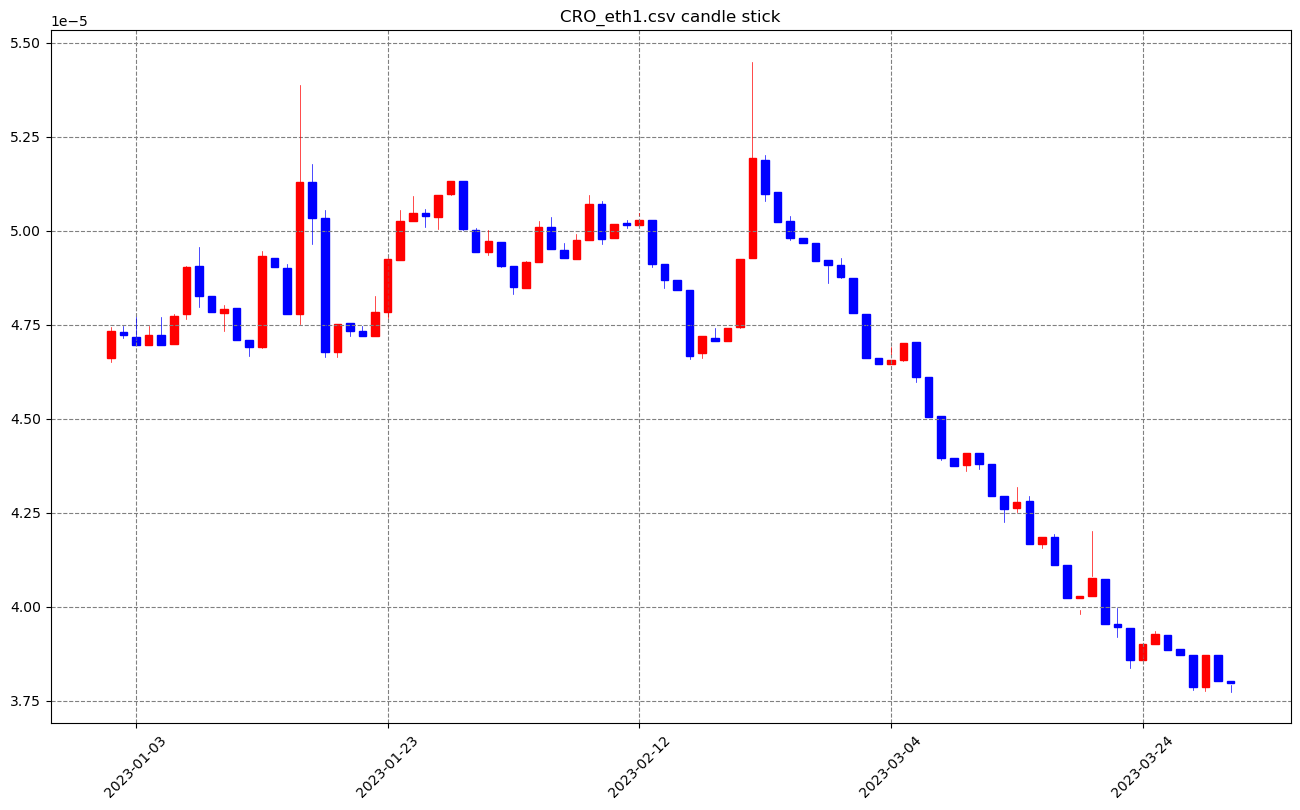

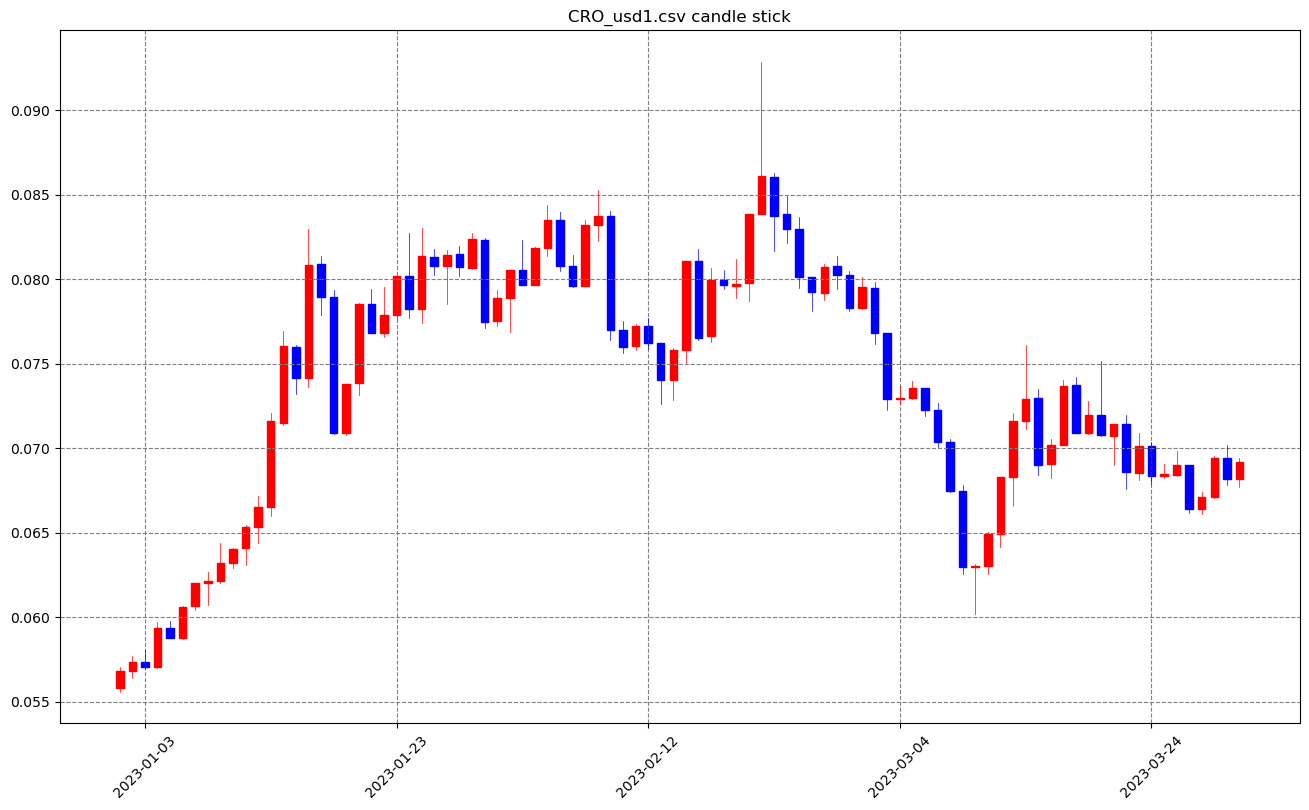

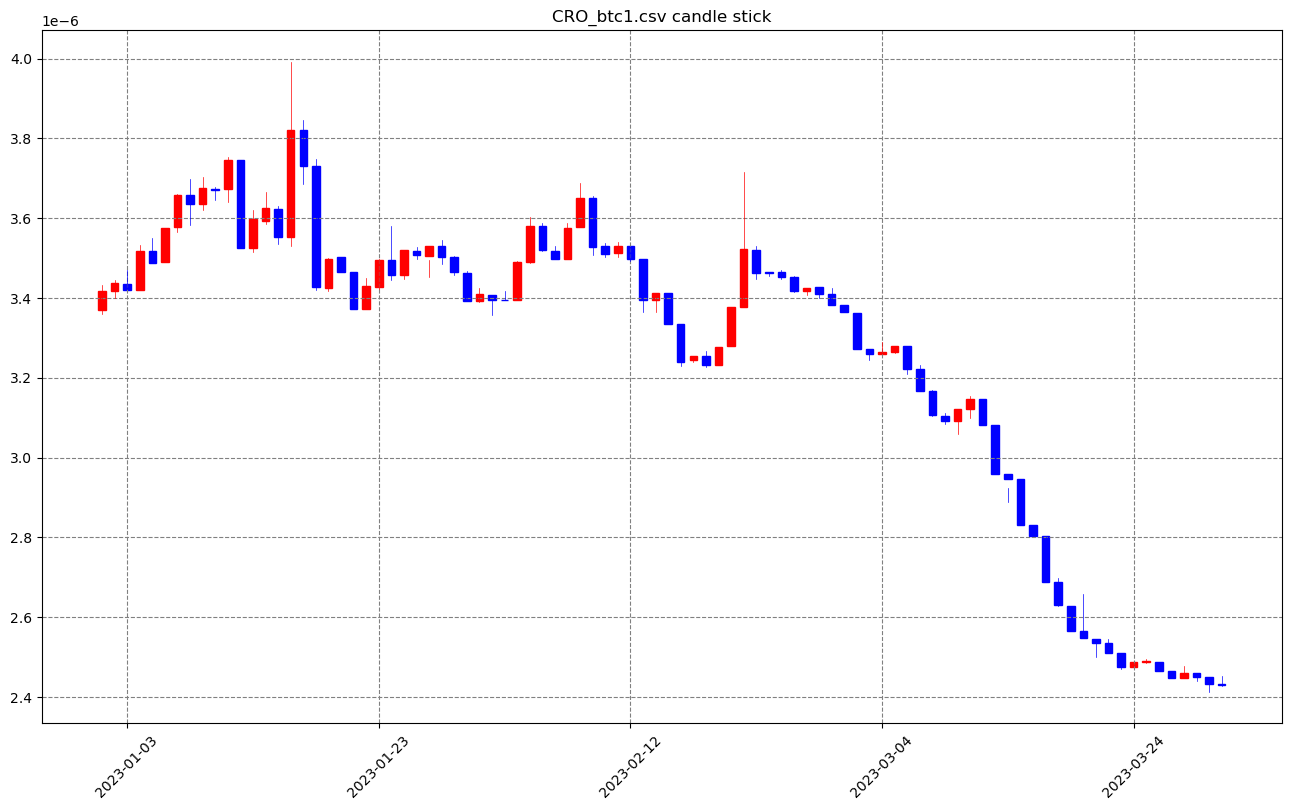

In [86]:
for i in range(len(file_list[7])):
    cdstick(globals()[f"CRO_data{i}"],file_list[7][i])

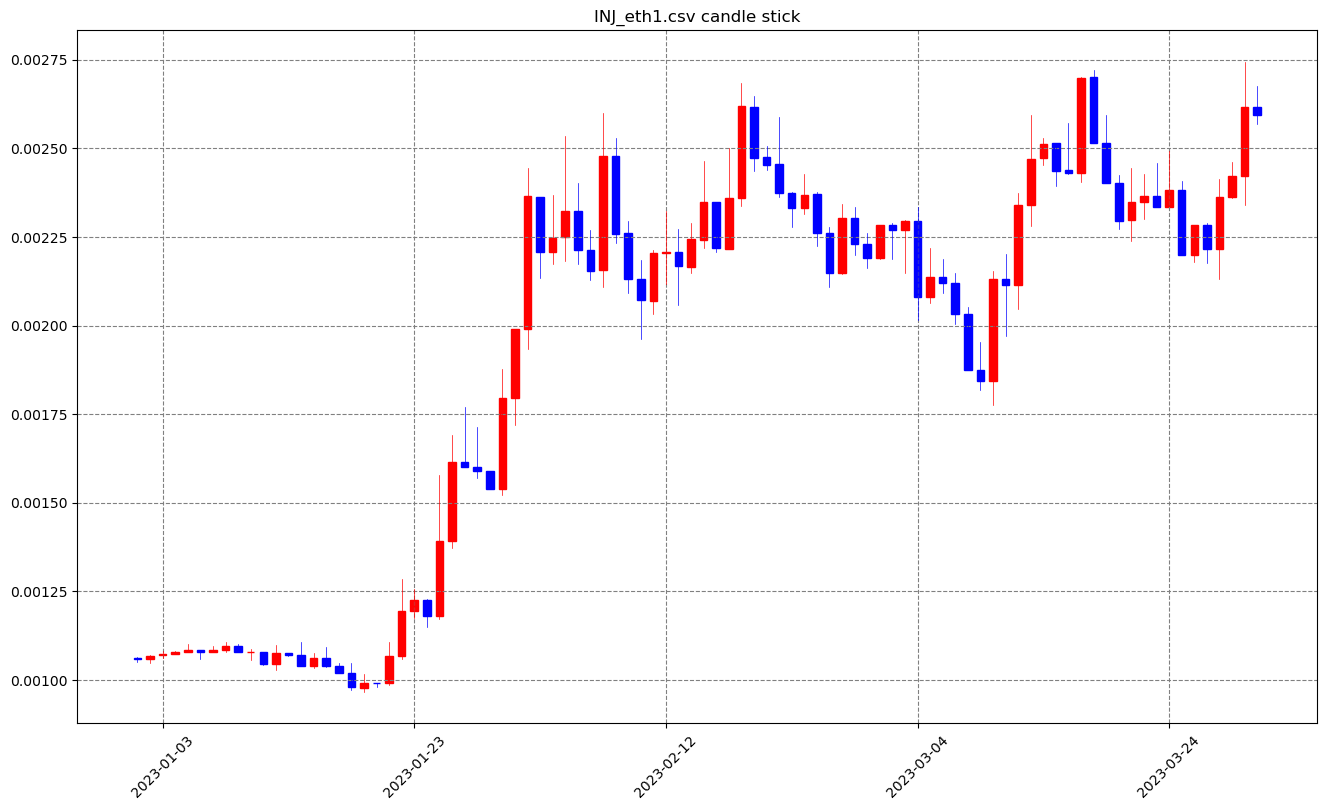

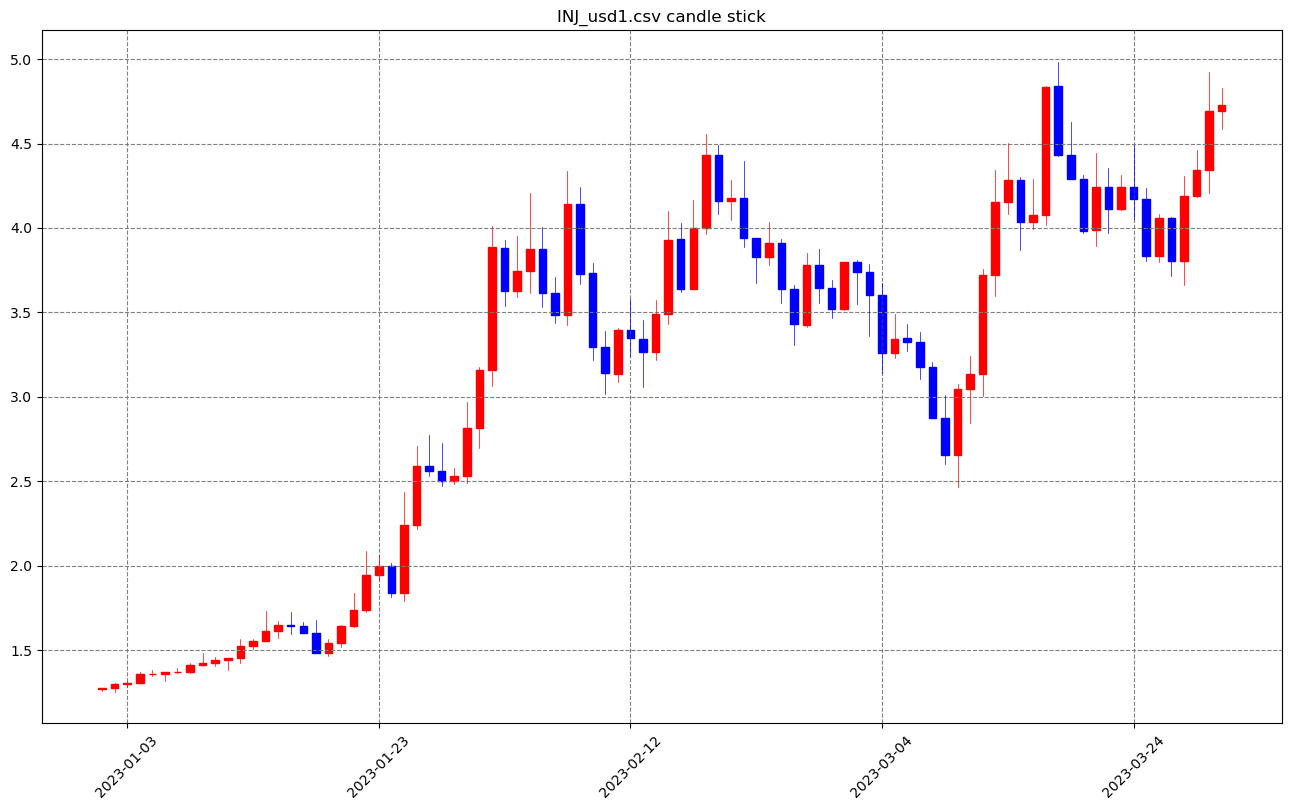

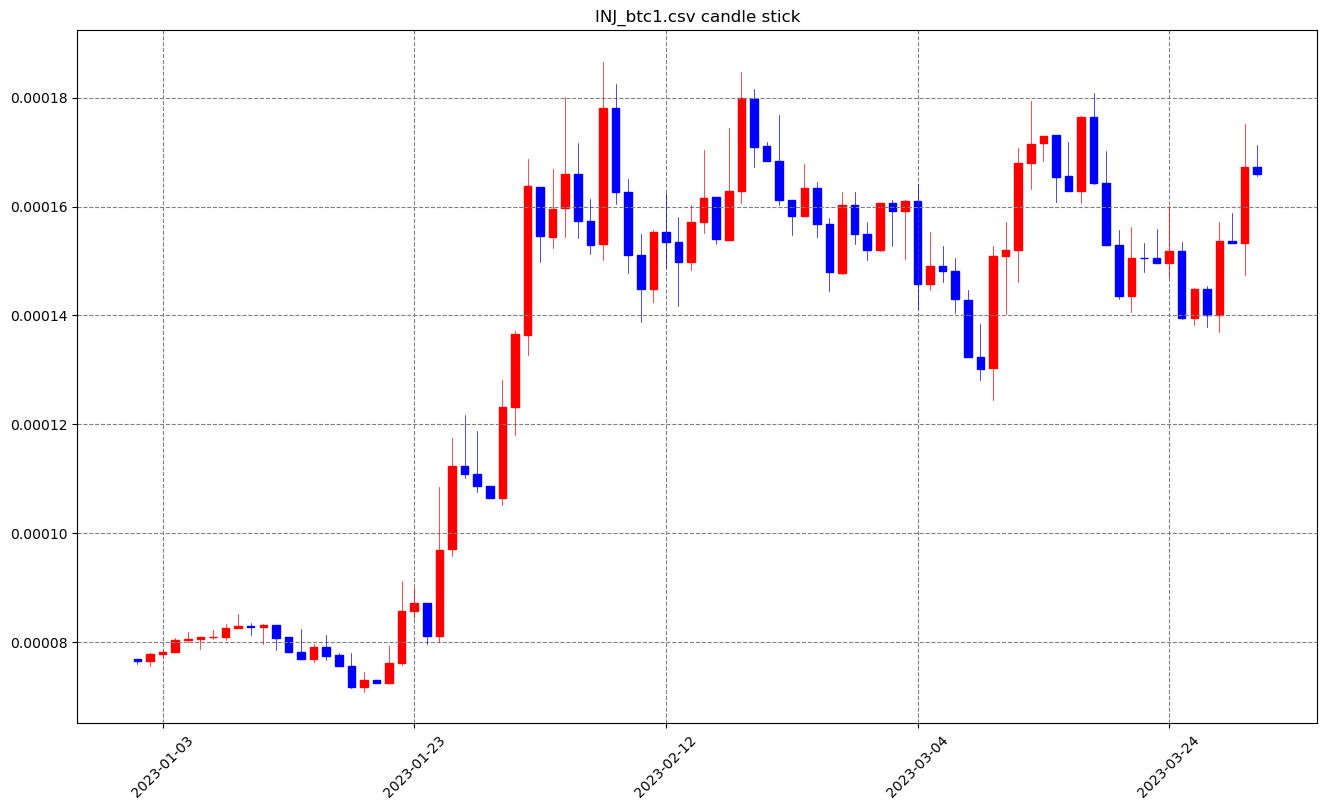

In [87]:
for i in range(len(file_list[8])):
    cdstick(globals()[f"INJ_data{i}"],file_list[8][i])

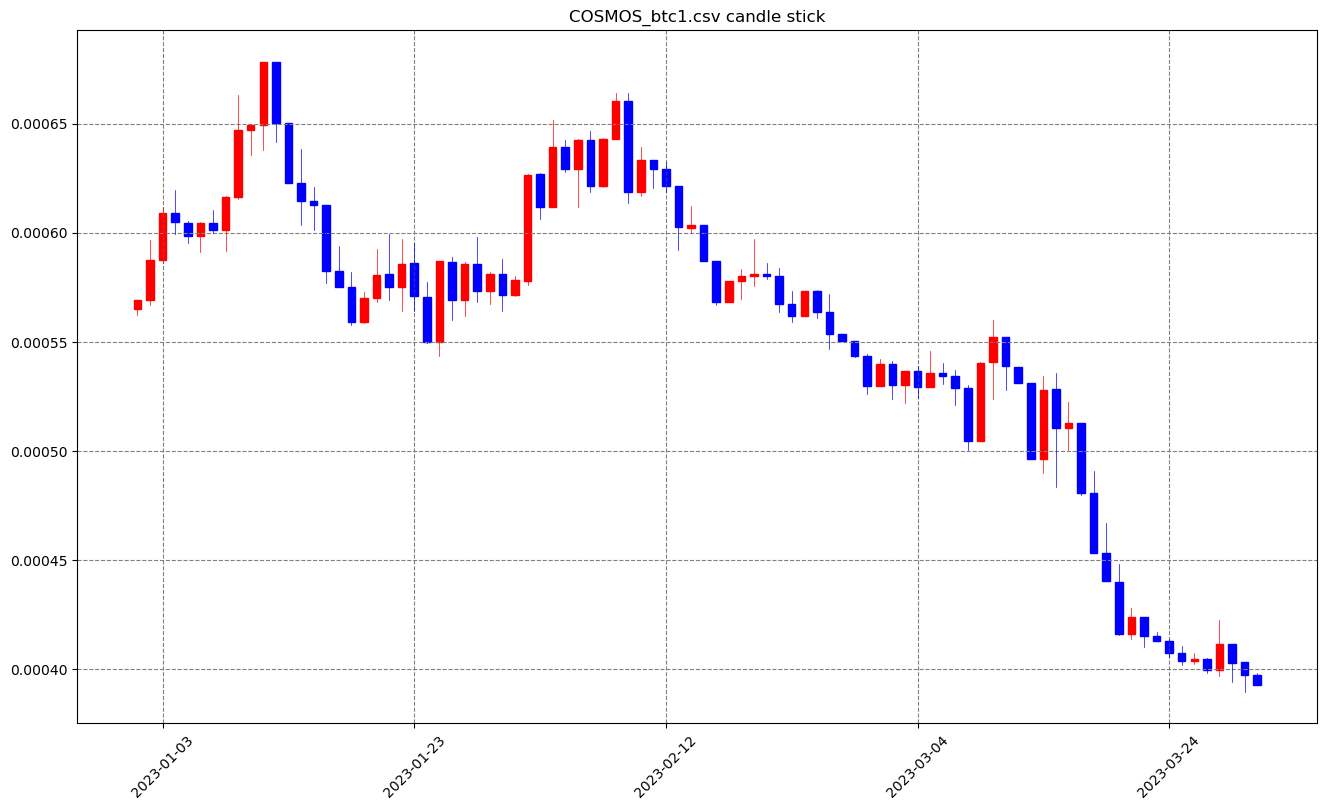

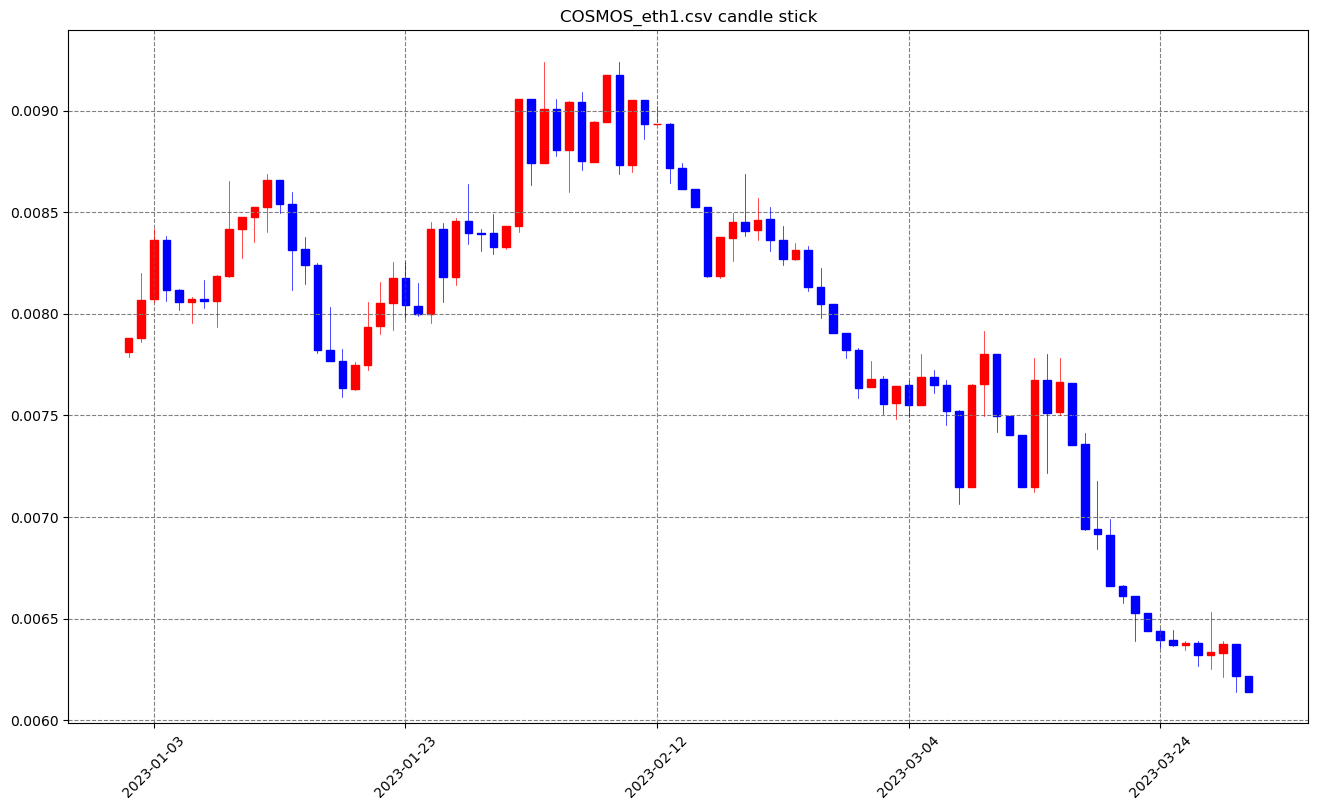

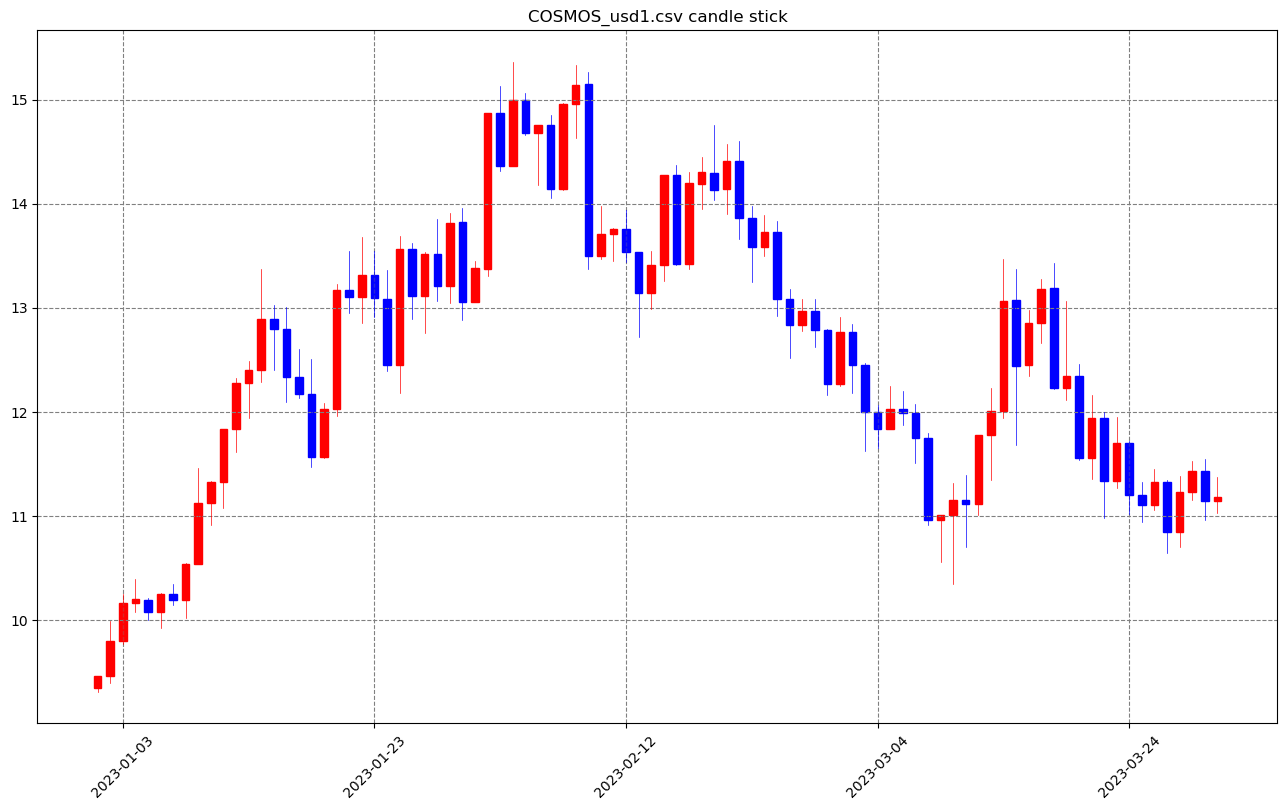

In [88]:
for i in range(len(file_list[9])):
    cdstick(globals()[f"COSMOS_data{i}"],file_list[9][i])

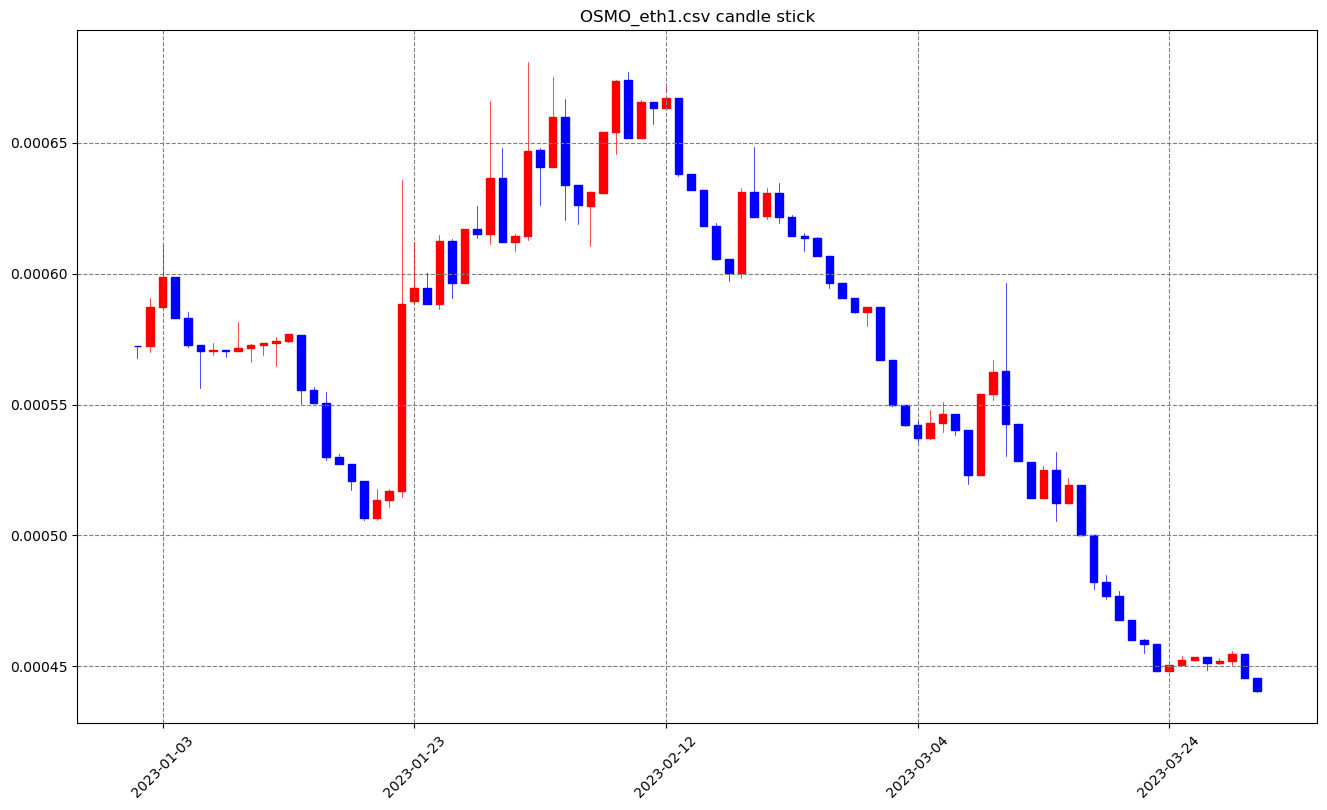

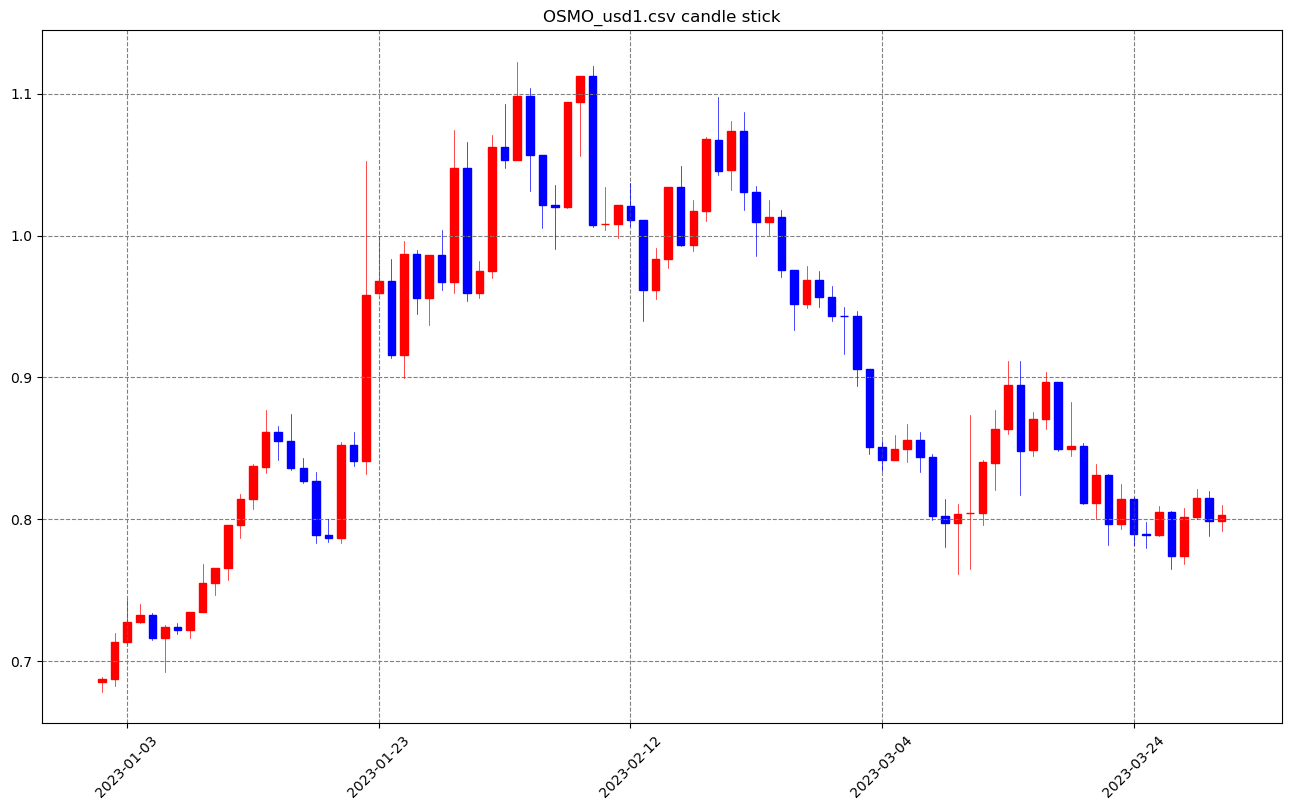

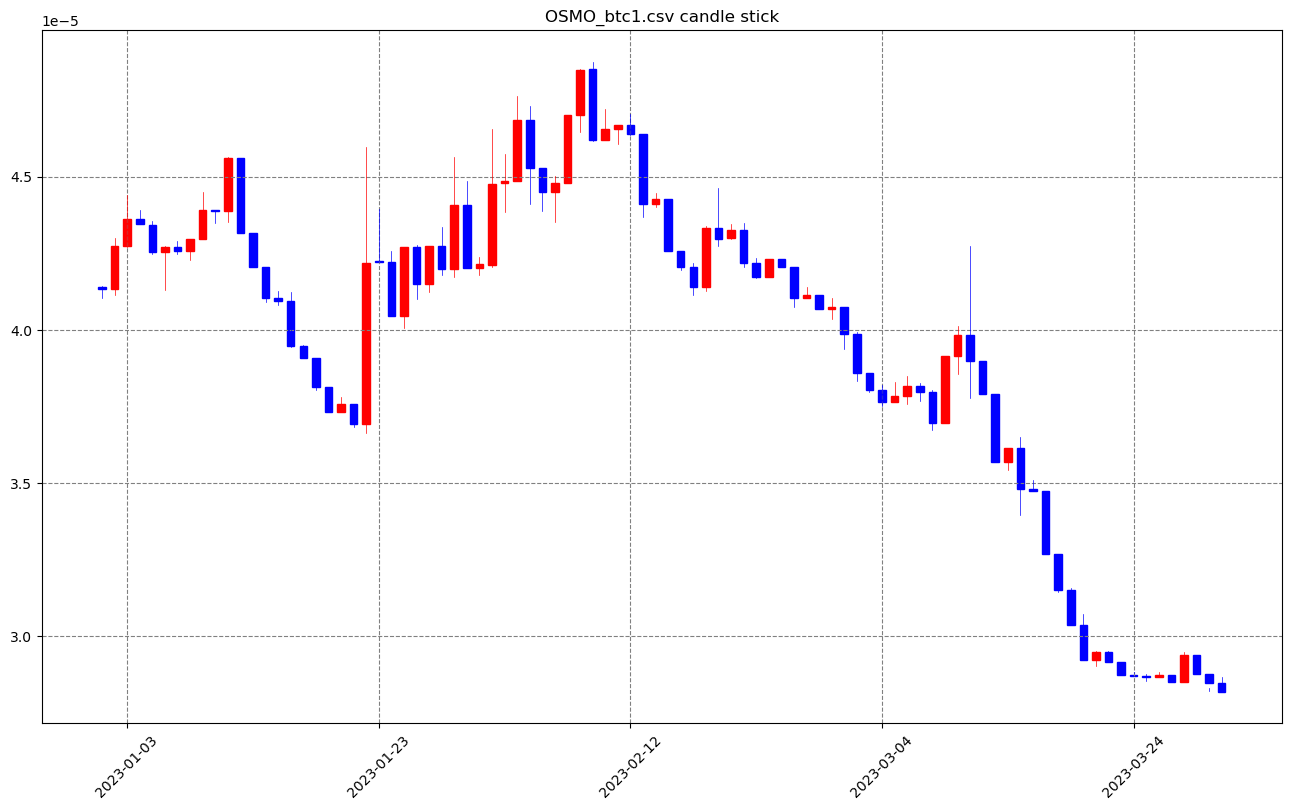

In [89]:
for i in range(len(file_list[10])):
    cdstick(globals()[f"OSMO_data{i}"],file_list[10][i])

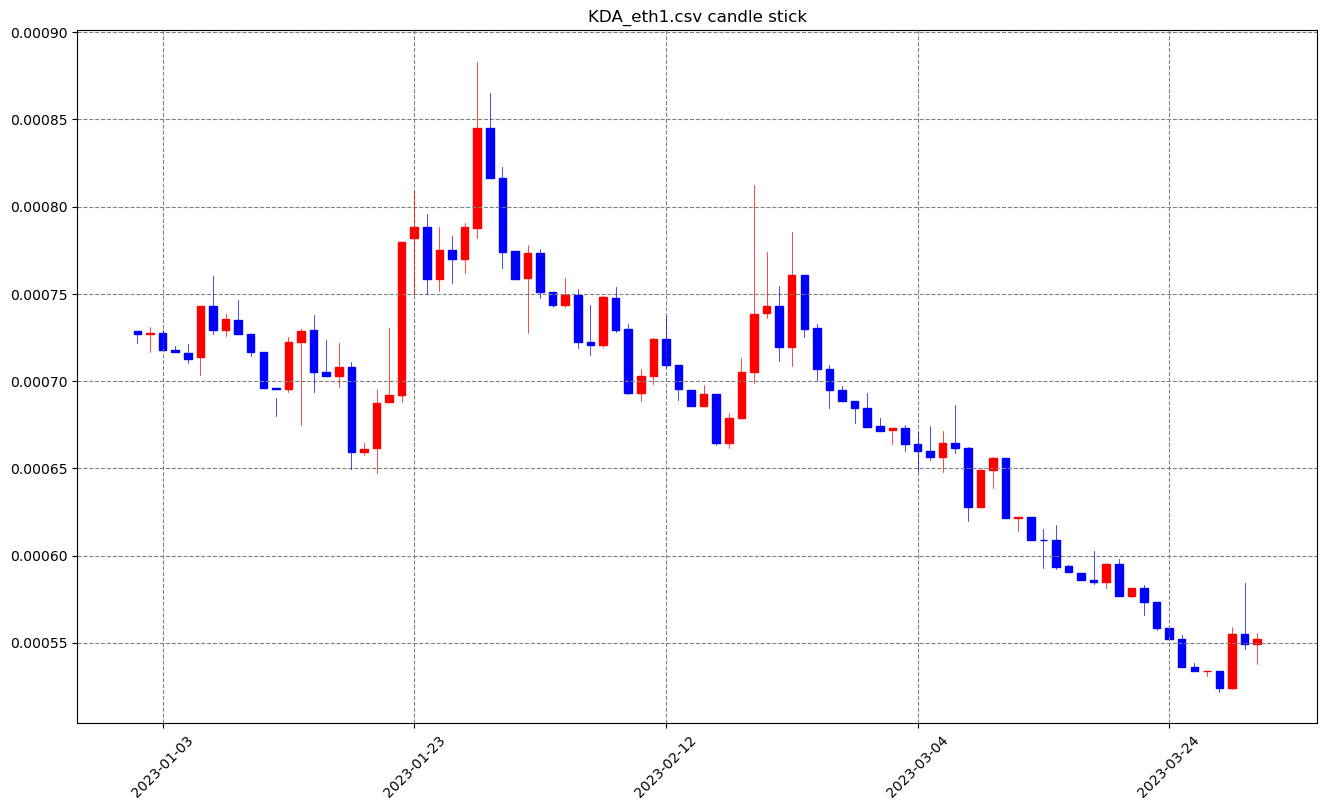

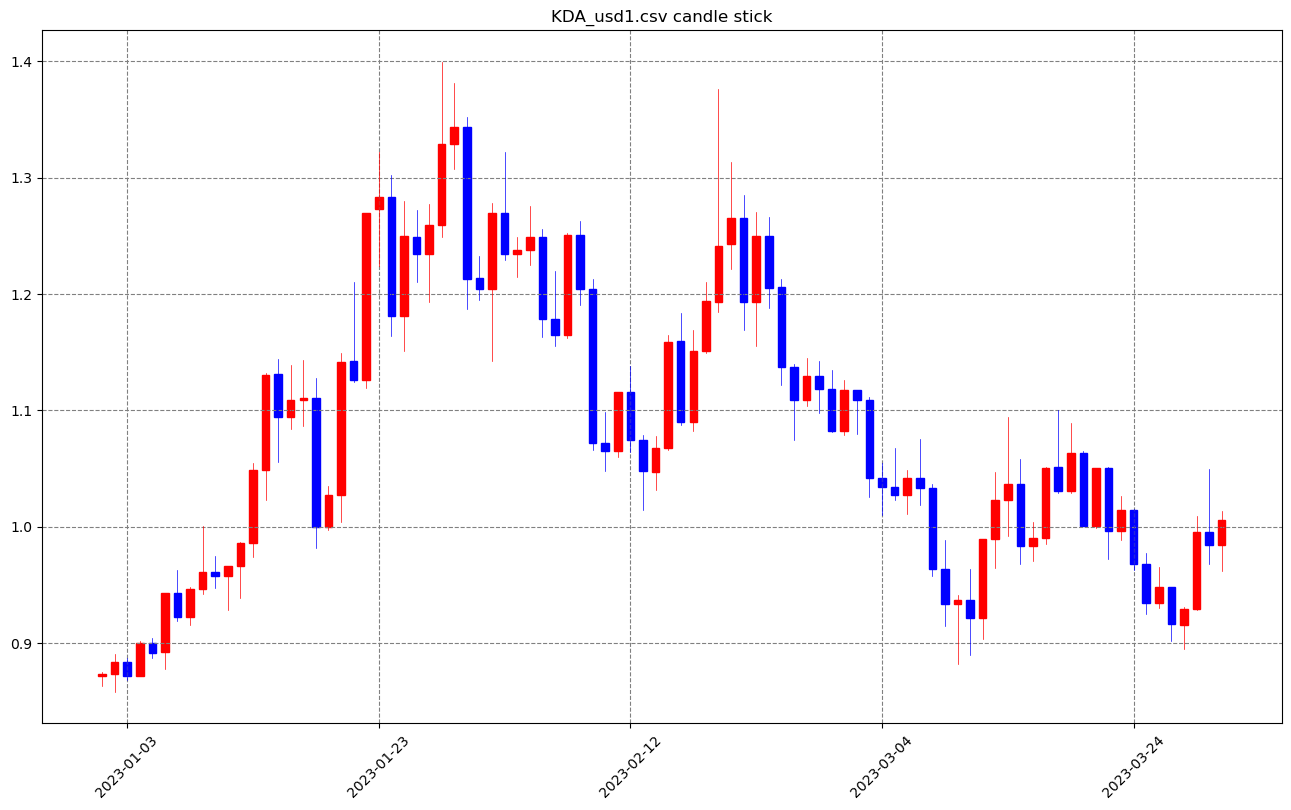

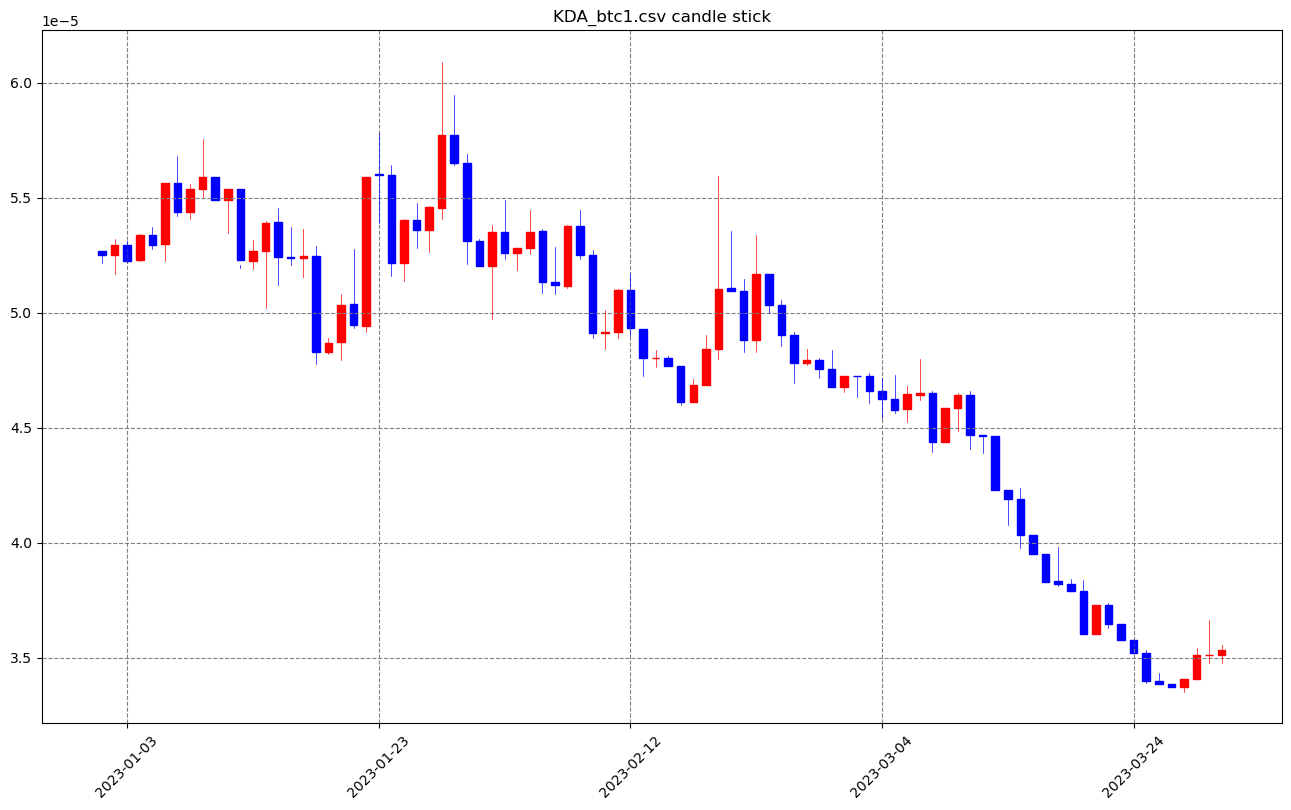

In [91]:
for i in range(len(file_list[11])):
    cdstick(globals()[f"KDA_data{i}"],file_list[11][i])

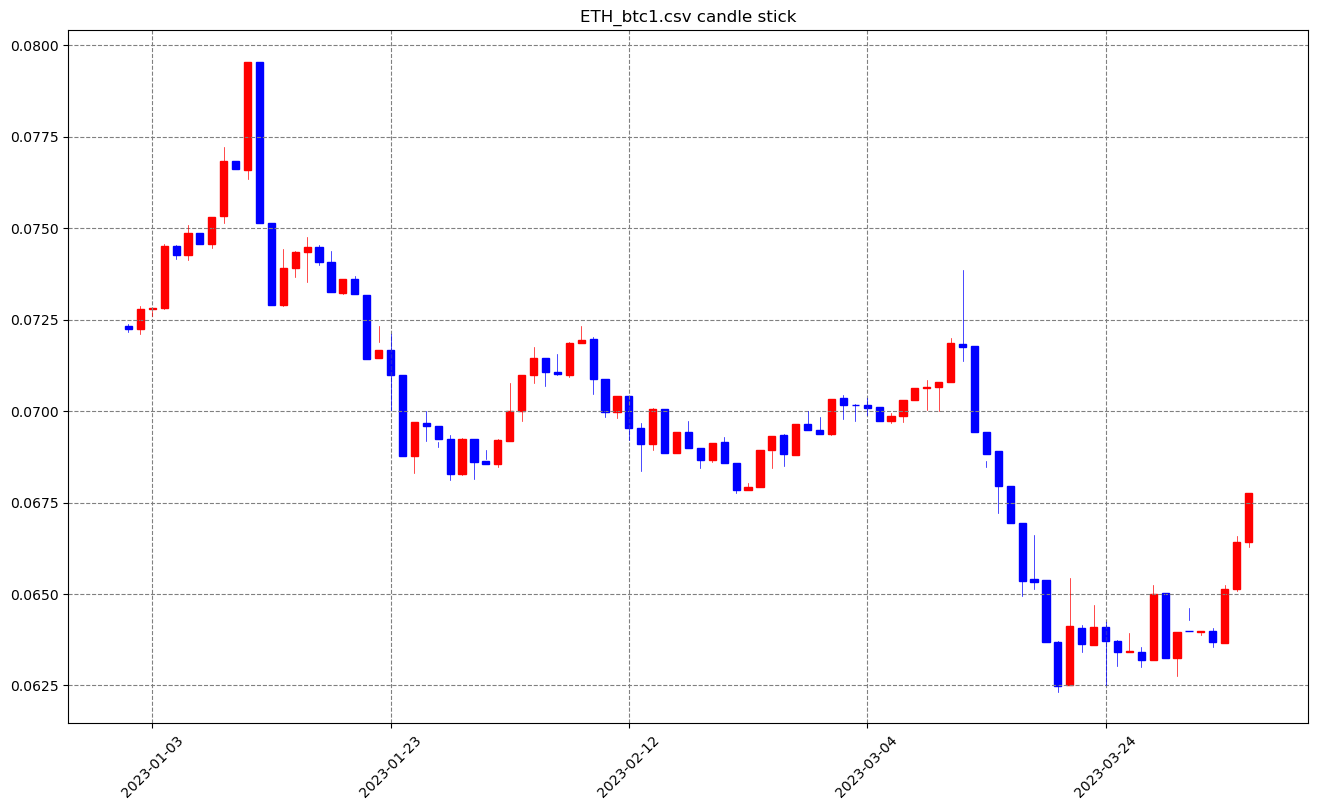

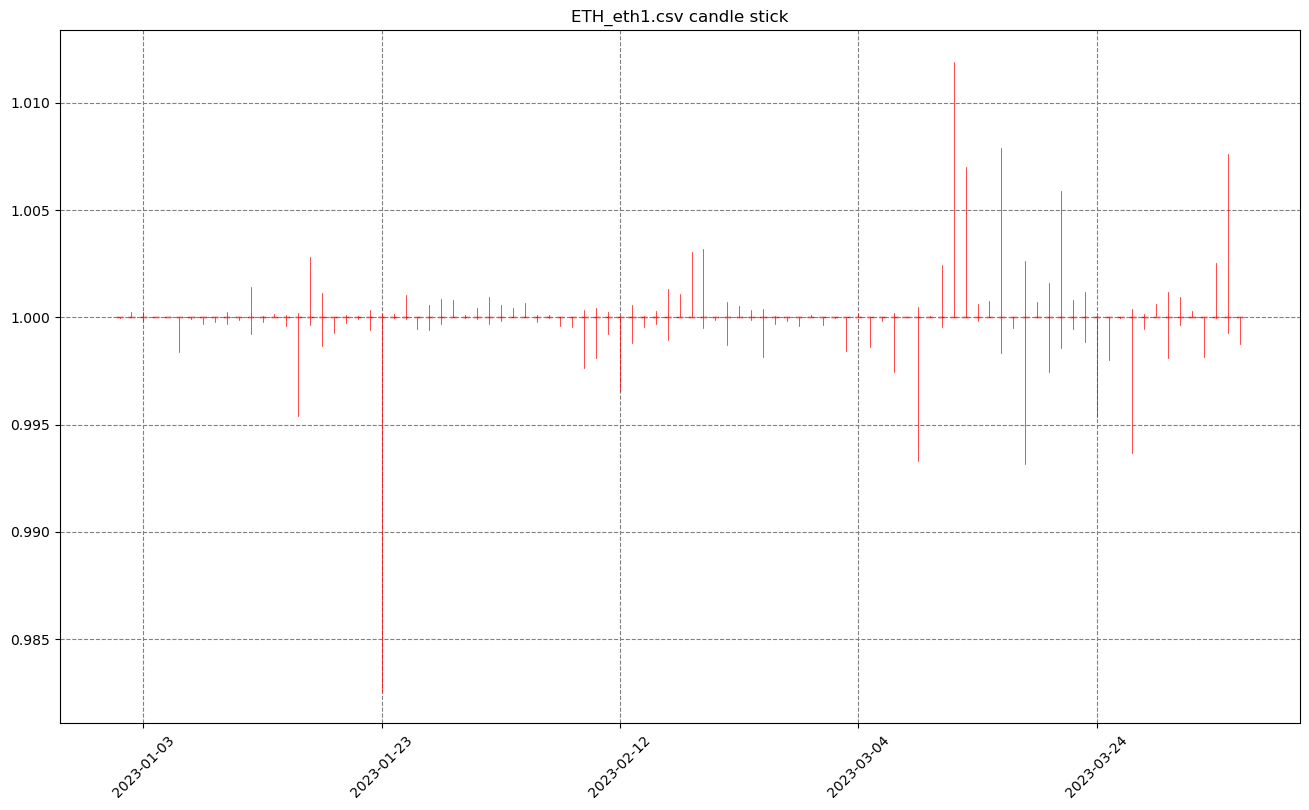

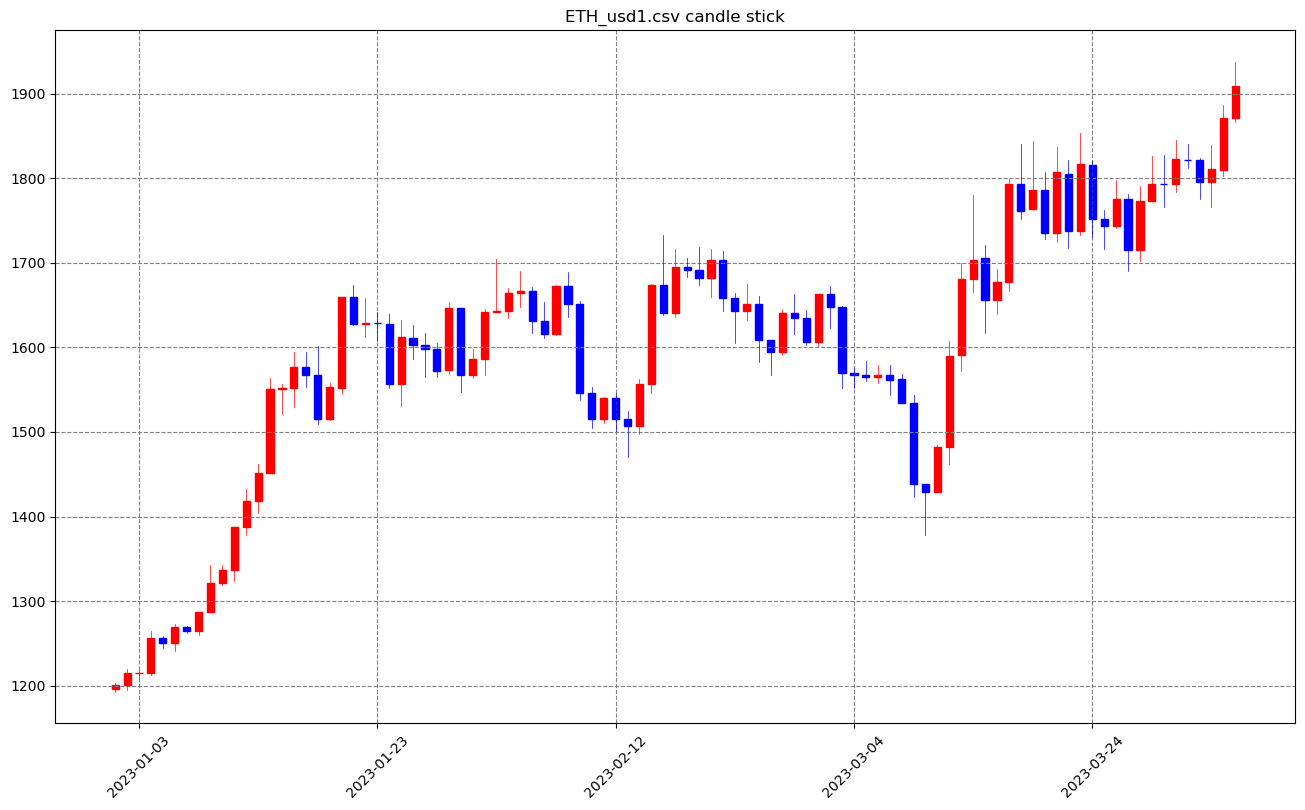

In [92]:
for i in range(len(file_list[12])):
    cdstick(globals()[f"ETH_data{i}"],file_list[12][i])